In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Part 1 Data Analysis

In [2]:
data = pd.read_csv("Crimes_-_2001_to_Present.csv")
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [3]:
data['Primary Type'].value_counts()

THEFT                                1642148
BATTERY                              1422913
CRIMINAL DAMAGE                       887266
NARCOTICS                             747633
ASSAULT                               507296
OTHER OFFENSE                         483642
BURGLARY                              424397
MOTOR VEHICLE THEFT                   375495
DECEPTIVE PRACTICE                    344940
ROBBERY                               292334
CRIMINAL TRESPASS                     214316
WEAPONS VIOLATION                     106418
PROSTITUTION                           69840
OFFENSE INVOLVING CHILDREN             55719
PUBLIC PEACE VIOLATION                 52325
SEX OFFENSE                            30683
CRIM SEXUAL ASSAULT                    27631
INTERFERENCE WITH PUBLIC OFFICER       18392
LIQUOR LAW VIOLATION                   14901
GAMBLING                               14618
ARSON                                  13249
HOMICIDE                               12548
KIDNAPPING

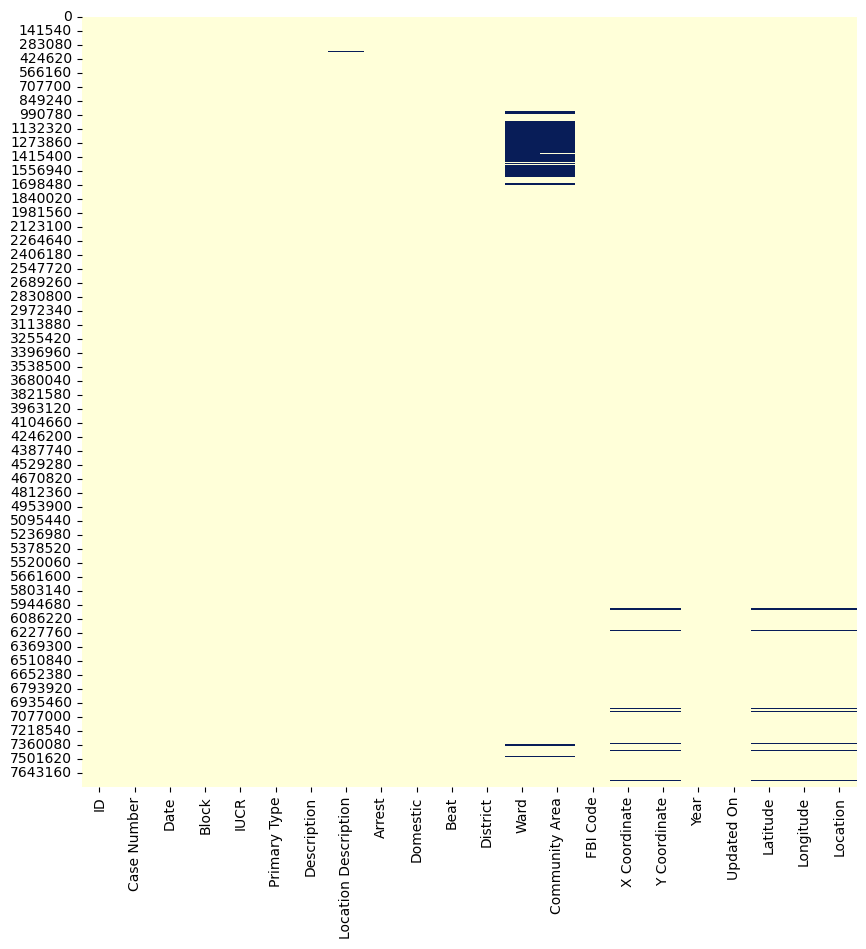

In [9]:
# Show null values
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cbar=False,cmap='YlGnBu')
plt.show()

In early years, a large portion of observations have missing location-related variables. The data is of good quality in recent years.

The data in 2023 is incomplete. So we drop the data in 2023.

In [4]:
# observe the lastest date
data['Date'] = pd.to_datetime(data['Date'])
# observe the time range of the data every year
data['Date'].groupby(data.Date.dt.year).agg(['min', 'max'])

,min,max
Date,,
2001,2001-01-01,2001-12-31 23:58:00
2002,2002-01-01,2002-12-31 23:59:00
2003,2003-01-01,2003-12-31 23:59:00
2004,2004-01-01,2004-12-31 23:59:00
2005,2005-01-01,2005-12-31 23:59:00
2006,2006-01-01,2006-12-31 23:59:00
2007,2007-01-01,2007-12-31 23:59:08
2008,2008-01-01,2008-12-31 23:59:00
2009,2009-01-01,2009-12-31 23:55:00


The data in 2023 is incomplete. So we drop the data in 2023.

In [5]:
data = data[data['Date'].dt.year < 2023]
data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784659,12847575,JF420478,2022-09-01 05:00:00,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,44.0,6.0,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
7784660,12847801,JF420319,2022-07-08 00:00:00,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,...,9.0,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
7784661,12847324,JF420102,2022-09-27 11:00:00,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,...,5.0,43.0,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
7784662,12847570,JF420427,2022-09-03 10:25:00,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"


## Violent Crimes
Following the definition of National Institute of Justice, I define the following types of crimes as violent crimes:

In [6]:
violent_crime = ['BATTERY', 'ASSAULT', 'ROBBERY', 'CRIM SEXUAL ASSAULT', 'SEX OFFENSE', 'HOMICIDE', 
                 'KIDNAPPING', 'ARSON', 'OFFENSE INVOLVING CHILDREN']

In [7]:
keep_column = ['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description', 'Location Description', 
               'District', 'Community Area', 'Arrest']
data = data[keep_column]
data['Violent_crime'] = 'Non-Violent Crime'
data['Violent_crime'] = data['Violent_crime'].where(data['Primary Type']
                                                                  .apply(lambda x: x not in violent_crime), 
                                                                  'Violent Crime')
data['year'] = data['Date'].dt.year
data.head()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,District,Community Area,Arrest,Violent_crime,year
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,9.0,61.0,False,Violent Crime,2015
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,15.0,25.0,False,Non-Violent Crime,2015
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,6.0,44.0,False,Non-Violent Crime,2018
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,14.0,21.0,True,Non-Violent Crime,2015
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,15.0,25.0,False,Violent Crime,2015


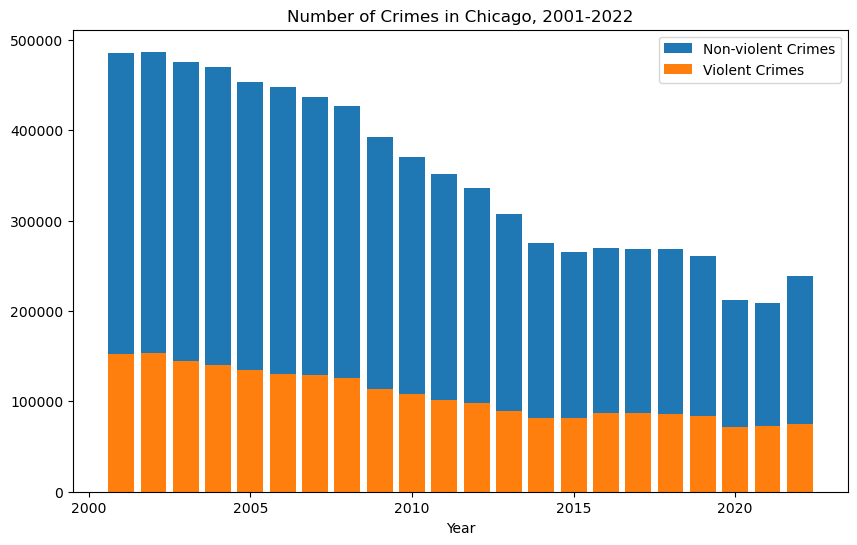

In [8]:
# violent crimes and non-violent crimes by year
from matplotlib import pyplot as plt
fig,ax=plt.subplots(figsize=(10,6))

data_count = data.groupby(['Violent_crime','year'])['Date'].count().unstack()
year=[int(i) for i in data_count.columns]  
value=data_count.T.values
v1=[i[0]+i[1] for i in value]
v2=[i[1] for i in value]

ax.bar(year,v1)
ax.bar(year,v2)
ax.set(xlabel="Year",title="Number of Crimes in Chicago, 2001-2022")
ax.legend(["Non-violent Crimes", "Violent Crimes"])
plt.show()

We can see both violent crimes and non-violent crimes have been decreasing since 2001. The number of violent crimes is much smaller than non-violent crimes.

In [9]:
# the proportion of violent crimes
propotion = data_count.loc['Violent Crime']/(data_count.loc['Violent Crime']+data_count.loc['Non-Violent Crime'])
propotion

year
2001    0.313198
2002    0.314890
2003    0.302843
2004    0.298502
2005    0.297190
2006    0.289874
2007    0.294680
2008    0.293255
2009    0.290136
2010    0.290376
2011    0.287058
2012    0.293027
2013    0.291582
2014    0.297540
2015    0.308221
2016    0.324316
2017    0.322272
2018    0.320170
2019    0.321055
2020    0.340135
2021    0.350610
2022    0.314787
dtype: float64

On average, 30% of crimes are violent crimes.

In [10]:
vcrimes = data[data['Violent_crime'] == 'Violent Crime']
vcrimes_count = pd.DataFrame(vcrimes['Primary Type'].value_counts())
vcrimes_count = vcrimes_count.reset_index()
# 画饼状图，显示violent crimes的类型，以及其占比,不要图例
vcrimes_count.plot.pie(y='count', labels=vcrimes_count['Primary Type'], autopct='%1.1f%%', figsize=(8, 8), legend=False)
plt.title('The Distribution of Violent Crimes')

KeyError: 'count'

## Seasonality
Firstly, I plot the number of crimes per month to confirm the fluctuations of the number of crimes show regular patterns.

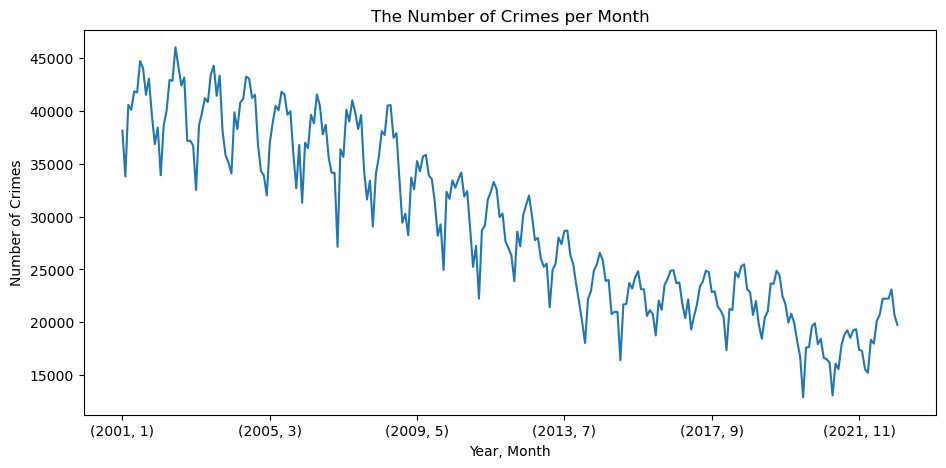

In [11]:
# the number of crimes per month per year
plt.figure(figsize=(11,5))
data['Date'].groupby([data.Date.dt.year, data.Date.dt.month]).count().plot(kind="line")
plt.title('The Number of Crimes per Month')
plt.xlabel('Year, Month')
plt.ylabel('Number of Crimes')
plt.show()

The picture shows that there's a significent periodicity in the number of crimes, with the overall tendency of decreasing.

Further, we plot the number of all violent crimes (homicide) by month. Violent crimes are the most frequent in July and least frequent in February. We take homicides as an example to show the number of violent crimes by month.

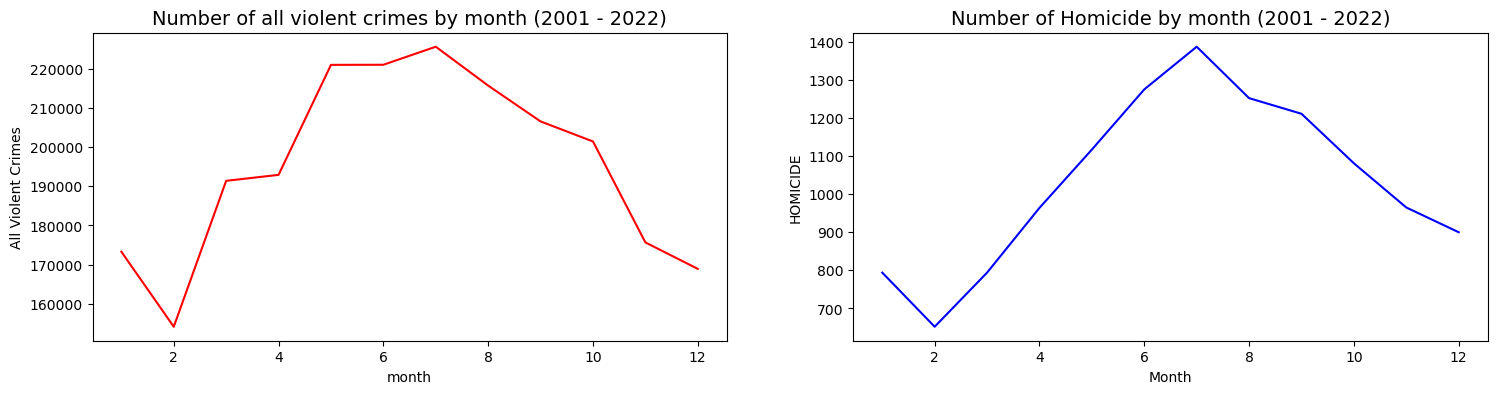

In [12]:
# Violent crimes increase rate by month 
vcrimes['month']=vcrimes['Date'].dt.month
vcrimes['time']=vcrimes['Date'].dt.hour
vcrimes['weekday']=vcrimes['Date'].dt.weekday
data_count = pd.DataFrame(vcrimes.groupby(['month'])['Date'].count()).\
    join(pd.DataFrame(vcrimes[vcrimes['Primary Type']=='HOMICIDE'].groupby(['month'])['ID'].count())).reset_index()
data_count.columns = ['month', 'All Violent Crimes', 'HOMICIDE']
fig, ax = plt.subplots(1, 2, figsize=(18,4))
v_val = data_count['All Violent Crimes'].values
h_val = data_count['HOMICIDE'].values 

sns.lineplot(x="month", y="All Violent Crimes", data=data_count, ax=ax[0], color='r')
ax[0].set_title('Number of all violent crimes by month (2001 - 2022)', fontsize=14)

sns.lineplot(x="month", y="HOMICIDE", data=data_count, ax=ax[1], color='b')
ax[1].set_title('Number of Homicide by month (2001 - 2022)', fontsize=14)

plt.xlabel('Month')
plt.show()

Text(0.5, 1.0, 'The Distribution of Homicide Locations')

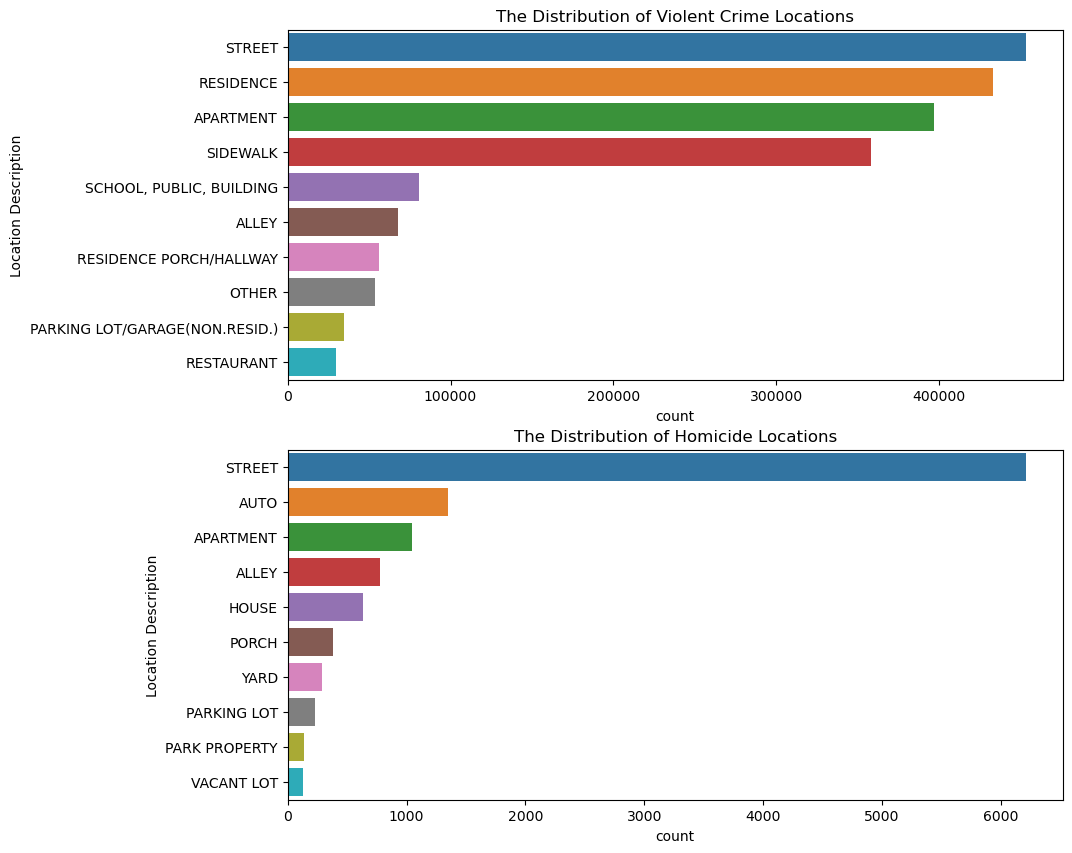

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
vcrimes_count = pd.DataFrame(vcrimes['Location Description'].value_counts().sort_values(ascending=False).iloc[:7])
sns.countplot(y= 'Location Description', data = vcrimes, ax = ax[0],
              order = vcrimes['Location Description'].value_counts().iloc[:10].index)
ax[0].set_title('The Distribution of Violent Crime Locations')

vcrimes_homicide=vcrimes[vcrimes['Primary Type']=='HOMICIDE']
vcrimes_count = pd.DataFrame(vcrimes_homicide['Location Description'].value_counts().\
                             sort_values(ascending=False).iloc[:7])
sns.countplot(y= 'Location Description', data = vcrimes_homicide, ax = ax[1],
              order = vcrimes_homicide['Location Description'].value_counts().iloc[:10].index)
ax[1].set_title('The Distribution of Homicide Locations')

# The relationship between Weather and Violent Crimes

In [14]:
temperature = pd.read_csv('archive/temperature.csv')
temperature = temperature[['datetime', 'Chicago']]
temperature['datetime'] = pd.to_datetime(temperature['datetime'])
temperature['date'] = temperature['datetime'].dt.date
temperature.describe()

,Chicago
count,45250.000000
mean,283.350573
std,10.997137
min,248.890000
25%,275.172450
50%,283.940667
75%,292.280000
max,308.480000


We observe the temperature data from 2012 to 2017. We calculate the daily average temperature, 6-hour moving average temperature, daily maximum temperature, and daily minimum temperature.

In [15]:
temperature['Daily_temp'] = temperature.groupby(['date'])['Chicago'].transform(np.mean)
temperature['MAver_temp_6h'] = temperature.sort_values(by=['datetime'])['Chicago'].rolling(window=6).mean().shift()
temperature['temp_max'] = temperature.groupby(['date'])['Chicago'].transform(np.max)
temperature['temp_min'] = temperature.groupby(['date'])['Chicago'].transform(np.min)

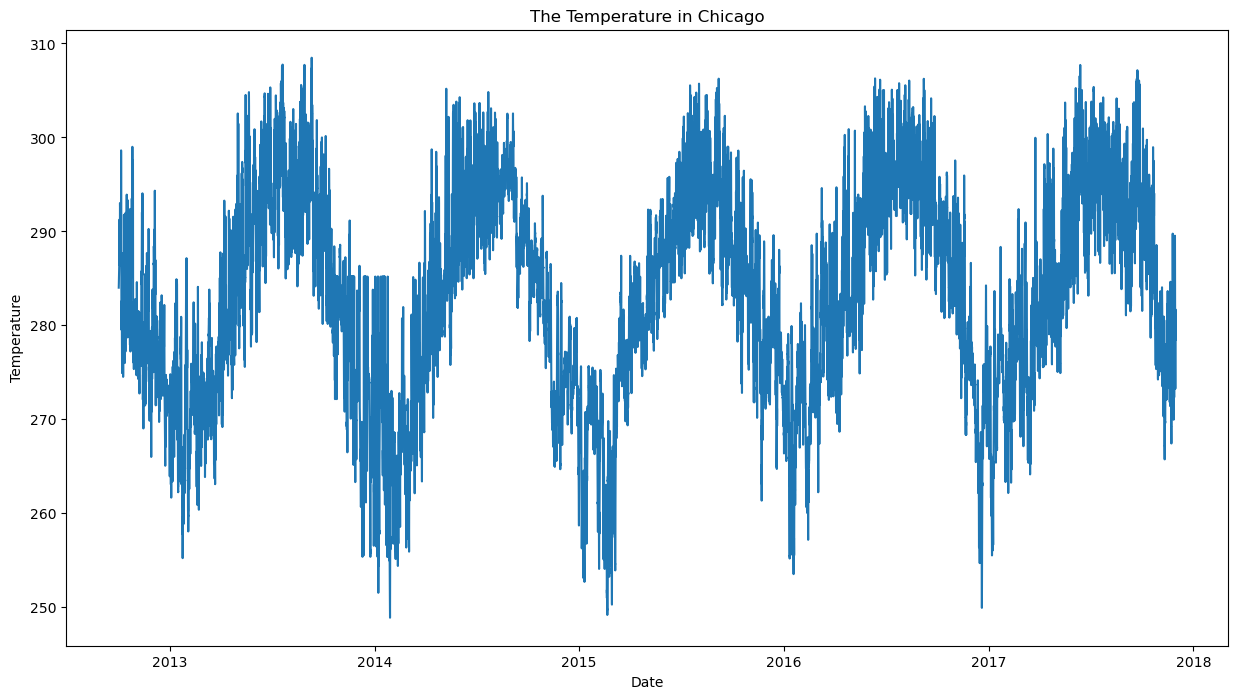

In [16]:
# visualize the temperature data,use line chart
plt.figure(figsize=[15,8])
plt.plot(temperature['datetime'], temperature['Chicago'])
plt.title('The Temperature in Chicago')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

We find that the data only contains 2012-2017. We merge the temperature data with the violent crimes data.

In [17]:
vcrime_weather = pd.merge(vcrimes.rename(columns={'Date':'datetime'}), temperature, on=['datetime']) 
vcrime_weather = vcrime_weather[~vcrime_weather['Chicago'].isnull()].rename(columns={'Chicago':'temperature'})

We consider the hourly temperature and weather description data. Based on weather descriptions, we produce some dummy variables, including:  
* rain_dummy: A dummy variable equals 1 if weather description contains word ‘rain’ or ‘drizzle’  
* snow_dummy: A dummy variable equals 1 if weather description contains word ‘snow’  
* storm_dummy: A dummy variable equals 1 if weather description contains word ‘thunderstorm’  
* heavy_list: A dummy variable equals 1 if weather description contains word ‘heavy’, ‘shower’, ‘thunderstorm’, ‘freezing’  
* fog_list: A dummy variable equals 1 if weather description contains word ‘fog’, ‘haze’

In [18]:
weather = pd.read_csv('archive/weather_description.csv')
weather = weather[['datetime', 'Chicago']]
# describe the weather data,first see the time range of the data
weather['datetime'] = pd.to_datetime(weather['datetime'])
weather['datetime'].groupby([weather.datetime.dt.year]).agg(['min', 'max'])

,min,max
datetime,,
2012,2012-10-01 12:00:00,2012-12-31 23:00:00
2013,2013-01-01 00:00:00,2013-12-31 23:00:00
2014,2014-01-01 00:00:00,2014-12-31 23:00:00
2015,2015-01-01 00:00:00,2015-12-31 23:00:00
2016,2016-01-01 00:00:00,2016-12-31 23:00:00
2017,2017-01-01 00:00:00,2017-11-30 00:00:00


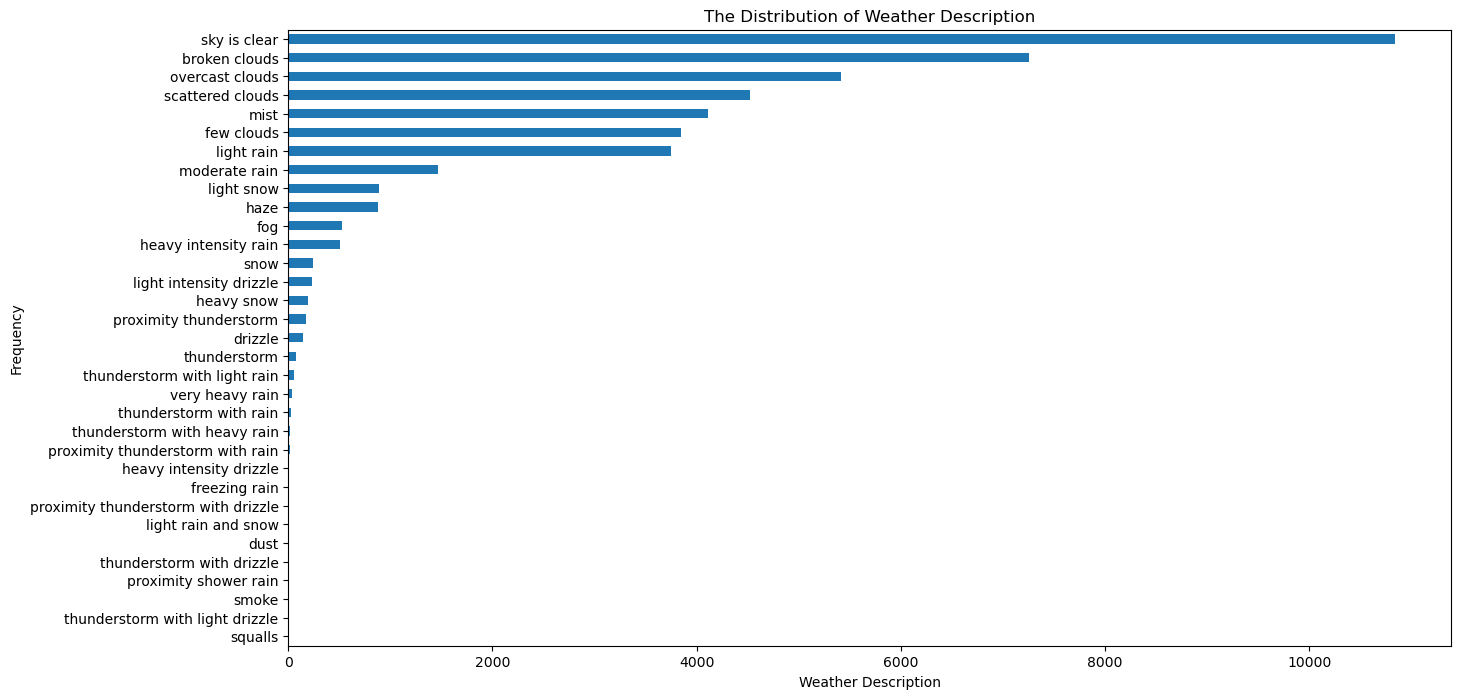

In [19]:
#　describe the weather data,see the unique values of the weather description,
weather['Chicago'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(15,8))
plt.title('The Distribution of Weather Description')
plt.xlabel('Weather Description')
plt.ylabel('Frequency')
plt.show()

In [20]:
weather_list = list(set(weather['Chicago']))
weather_list = [x for x in weather_list if x is not np.nan]
rain_list = [x for x in weather_list if (('rain' in x) | ('drizzle' in x))]
snow_list = [x for x in weather_list if 'snow' in x]
storm_list = [x for x in weather_list if 'thunderstorm' in x]
heavy_list = [x for x in weather_list if ('heavy' in x) | ('shower' in x) | ('thunderstorm' in x) |('freezing' in x)]
fog_list = [x for x in weather_list if ('fog' in x) | ('haze' in x)]

In [21]:
weather['rain_dummy'] = 0
weather['rain_dummy'] = weather['rain_dummy'].where(weather['Chicago'].apply(lambda x: x not in rain_list), 1)
weather['snow_dummy'] = 0
weather['snow_dummy'] = weather['snow_dummy'].where(weather['Chicago'].apply(lambda x: x not in snow_list), 1)
weather['storm_dummy'] = 0
weather['storm_dummy'] = weather['storm_dummy'].where(weather['Chicago'].apply(lambda x: x not in storm_list), 1)
weather['heavy_dummy'] = 0
weather['heavy_dummy'] = weather['heavy_dummy'].where(weather['Chicago'].apply(lambda x: x not in heavy_list), 1)
weather['fog_dummy'] = 0
weather['fog_dummy'] = weather['fog_dummy'].where(weather['Chicago'].apply(lambda x: x not in fog_list), 1)
# merge the weather data with the violent crimes data
vcrime_weather = pd.merge(vcrime_weather, weather, on=['datetime'])

Using a histogram, we examine the distribution violent crimes by temperature. More violent crimes happen in high temperature between 290 K and 300 K.

Text(0.5, 1.0, 'The Distribution of Violent Crimes by Temperature')

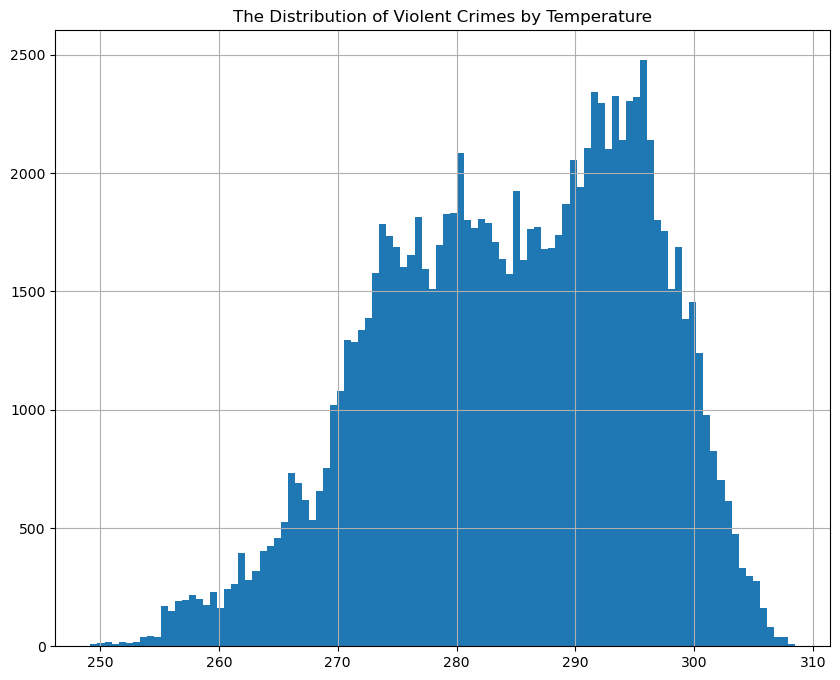

In [22]:
plt.figure(figsize=[10,8])
vcrime_weather['temperature'].hist(bins=100)
plt.title('The Distribution of Violent Crimes by Temperature')

Finally, we show the summary statistics of main variables and the mean values of main variables by violent crime primary types.

In [23]:
vcrime_weather[['temperature', 'Daily_temp', 'MAver_temp_6h', 'temp_max', 'temp_min', 
                'rain_dummy', 'snow_dummy', 'storm_dummy', 'heavy_dummy', 'fog_dummy']].describe().round(3)

,temperature,Daily_temp,MAver_temp_6h,temp_max,temp_min,rain_dummy,snow_dummy,storm_dummy,heavy_dummy,fog_dummy
count,107391.000,107391.000,107354.000,107391.000,107391.000,107391.000,107391.000,107391.000,107391.000,107391.000
mean,284.740,284.402,284.338,289.005,280.683,0.140,0.025,0.009,0.026,0.031
std,10.937,10.292,10.769,10.899,10.042,0.347,0.155,0.092,0.158,0.174
min,249.184,252.618,249.490,255.842,248.890,0.000,0.000,0.000,0.000,0.000
25%,276.520,276.727,276.327,280.664,273.550,0.000,0.000,0.000,0.000,0.000
50%,285.602,285.443,285.193,290.270,281.480,0.000,0.000,0.000,0.000,0.000
75%,293.710,293.382,293.213,298.640,289.133,0.000,0.000,0.000,0.000,0.000
max,308.480,303.316,307.234,308.480,299.290,1.000,1.000,1.000,1.000,1.000


In [24]:
vcrime_weather.groupby(['Primary Type'])[['temperature','temp_max', 'temp_min', 'rain_dummy', 'snow_dummy', 'storm_dummy', 
                                          'heavy_dummy', 'fog_dummy']].mean().round(3).sort_values(by=['temperature'])

,temperature,temp_max,temp_min,rain_dummy,snow_dummy,storm_dummy,heavy_dummy,fog_dummy
Primary Type,,,,,,,,
OFFENSE INVOLVING CHILDREN,283.111,287.275,279.173,0.148,0.027,0.009,0.031,0.029
KIDNAPPING,283.285,287.922,279.703,0.120,0.040,0.009,0.023,0.033
SEX OFFENSE,284.335,288.562,280.504,0.154,0.026,0.010,0.034,0.025
ASSAULT,284.805,289.297,280.937,0.140,0.024,0.008,0.025,0.033
BATTERY,284.862,289.118,280.766,0.139,0.024,0.009,0.026,0.031
CRIM SEXUAL ASSAULT,284.919,288.890,280.641,0.150,0.027,0.007,0.024,0.032
ROBBERY,284.988,289.015,280.711,0.134,0.025,0.008,0.024,0.030
HOMICIDE,285.882,290.315,281.729,0.072,0.066,0.000,0.006,0.024
ARSON,286.095,290.107,281.732,0.127,0.020,0.007,0.023,0.027


# Part 2 Data prepossessing

In [25]:
# calculate the number of violent crimes and homicides by hour
vcrime_hour = pd.DataFrame(vcrime_weather.set_index(['datetime']).resample('H').size()).\
    rename(columns={0:'vcrime_count'})
vcrime_hour['vcrime_dummy'] = vcrime_hour['vcrime_count'].astype(bool).astype(int)

homicide_hour = pd.DataFrame(vcrime_weather[vcrime_weather['Primary Type']=='HOMICIDE'].\
                             set_index(['datetime']).resample('H').size()).rename(columns={0:'homicide_count'})
homicide_hour['homicide_dummy'] = homicide_hour['homicide_count'].astype(bool).astype(int)

In [26]:
# merge the violent crimes data with the temperature and weather data
pd_hour_combine = vcrime_hour.join(homicide_hour).join(temperature.set_index(['datetime']).rename(columns={'Chicago':'temperature'})).\
    join(weather.set_index(['datetime']).drop(['Chicago'], axis=1))
pd_hour_combine[['homicide_count','homicide_dummy']] = pd_hour_combine[['homicide_count','homicide_dummy']].fillna(0)
pd_hour_combine = pd_hour_combine.drop(['date'],axis=1).reset_index()

# let the time predictor be the hour of the day
pd_hour_combine['year']=pd_hour_combine['datetime'].dt.year
pd_hour_combine['month']=pd_hour_combine['datetime'].dt.month
pd_hour_combine['time']=pd_hour_combine['datetime'].dt.hour
pd_hour_combine['weekday']=pd_hour_combine['datetime'].dt.weekday
pd_hour_combine.to_csv('Violent_Crime_Hourly.csv')
pd_hour_combine

,datetime,vcrime_count,vcrime_dummy,homicide_count,homicide_dummy,temperature,Daily_temp,MAver_temp_6h,temp_max,temp_min,rain_dummy,snow_dummy,storm_dummy,heavy_dummy,fog_dummy,year,month,time,weekday
0,2012-10-01 13:00:00,1,1,0.0,0.0,284.010000,284.552669,NaN,285.159182,284.01,0,0,0,0,0,2012,10,13,0
1,2012-10-01 14:00:00,4,1,0.0,0.0,284.054691,284.552669,NaN,285.159182,284.01,0,0,0,0,0,2012,10,14,0
2,2012-10-01 15:00:00,3,1,0.0,0.0,284.177412,284.552669,NaN,285.159182,284.01,0,0,0,0,0,2012,10,15,0
3,2012-10-01 16:00:00,2,1,0.0,0.0,284.300133,284.552669,NaN,285.159182,284.01,0,0,0,0,0,2012,10,16,0
4,2012-10-01 17:00:00,4,1,0.0,0.0,284.422855,284.552669,NaN,285.159182,284.01,0,0,0,0,0,2012,10,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45247,2017-11-29 20:00:00,1,1,0.0,0.0,281.340000,279.479583,277.906667,287.040000,273.26,0,0,0,0,0,2017,11,20,2
45248,2017-11-29 21:00:00,3,1,0.0,0.0,281.690000,279.479583,279.253333,287.040000,273.26,0,0,0,0,0,2017,11,21,2
45249,2017-11-29 22:00:00,2,1,0.0,0.0,281.070000,279.479583,280.333333,287.040000,273.26,0,0,0,0,0,2017,11,22,2
45250,2017-11-29 23:00:00,2,1,0.0,0.0,280.060000,279.479583,280.840000,287.040000,273.26,0,0,0,0,0,2017,11,23,2


In [27]:
# calculate the mean values of main variables by date
pd_hour_combine['date'] = pd_hour_combine['datetime'].dt.date
pd_date = pd_hour_combine.groupby(['date'])[['vcrime_dummy',  'homicide_dummy', 
                                             'temperature', 'Daily_temp', 'MAver_temp_6h', 'temp_max', 'temp_min', 
                                             'rain_dummy', 'snow_dummy', 'storm_dummy', 'heavy_dummy', 'fog_dummy']].mean()
pd_date['homicide_dummy'] = pd_date['homicide_dummy'].astype(bool).astype(int)
pd_date['vcrime_dummy'] = pd_date['vcrime_dummy'].astype(bool).astype(int)
pd_date['rain_dummy'] = pd_date['rain_dummy'].where(pd_date['rain_dummy']>0.1, 0)
pd_date['snow_dummy'] = pd_date['snow_dummy'].where(pd_date['snow_dummy']>0.1, 0)
pd_date['storm_dummy'] = pd_date['storm_dummy'].where(pd_date['storm_dummy']>0.1, 0)
pd_date['heavy_dummy'] = pd_date['heavy_dummy'].where(pd_date['heavy_dummy']>0.1, 0)
pd_date['fog_dummy'] = pd_date['fog_dummy'].where(pd_date['fog_dummy']>0.1, 0)
pd_date['vcrime_count']=pd_hour_combine.groupby(['date'])['vcrime_count'].sum()
pd_date['homicide_count']=pd_hour_combine.groupby(['date'])['homicide_count'].sum()
weather_dummy = ['rain_dummy', 'snow_dummy', 'storm_dummy', 'heavy_dummy', 'fog_dummy']
pd_date[weather_dummy] = pd_date[weather_dummy].astype(bool).astype(int)
pd_date.to_csv('Violent_Crime_Daily.csv')
pd_date

,vcrime_dummy,homicide_dummy,temperature,Daily_temp,MAver_temp_6h,temp_max,temp_min,rain_dummy,snow_dummy,storm_dummy,heavy_dummy,fog_dummy,vcrime_count,homicide_count
date,,,,,,,,,,,,,,
2012-10-01,1,0,284.552669,284.552669,284.486816,285.159182,284.010000,0,0,0,0,0,38,0.0
2012-10-02,1,0,287.713511,287.713511,286.956689,291.250000,285.281903,0,0,0,0,0,72,0.0
2012-10-03,1,0,289.127917,289.127917,288.886875,293.020000,286.380000,0,0,0,0,0,69,0.0
2012-10-04,1,0,290.032500,290.032500,290.164444,291.420000,289.070000,1,0,0,0,0,64,0.0
2012-10-05,1,0,291.207500,291.207500,290.739653,298.620000,287.330000,1,0,0,0,0,61,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,1,0,275.980833,275.980833,276.062361,282.780000,269.960000,0,0,0,0,0,49,0.0
2017-11-27,1,0,279.128333,279.128333,278.529375,286.540000,272.340000,0,0,0,0,1,55,0.0
2017-11-28,1,0,285.730833,285.730833,285.241528,289.540000,283.390000,0,0,0,0,0,55,0.0


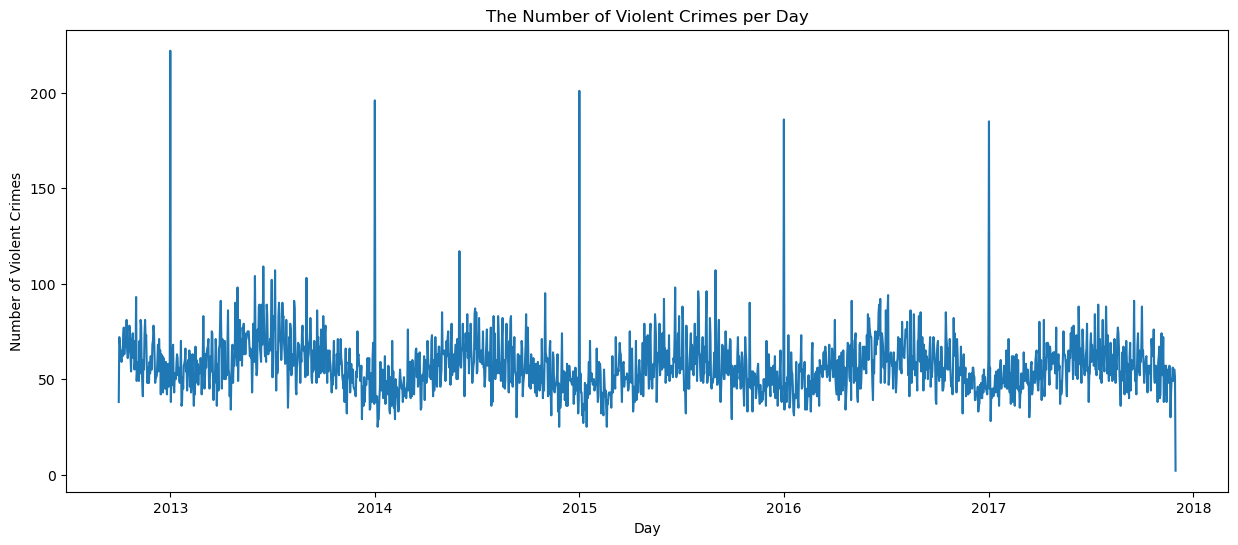

In [28]:
# show the line chart of the number of violent crimes by day
plt.figure(figsize=(15, 6))
plt.plot(pd_date.index, pd_date['vcrime_count'])
plt.title('The Number of Violent Crimes per Day')
plt.xlabel('Day')
plt.ylabel('Number of Violent Crimes')
plt.show()
pd_date.to_csv('Violent_Crime_Monthly.csv')

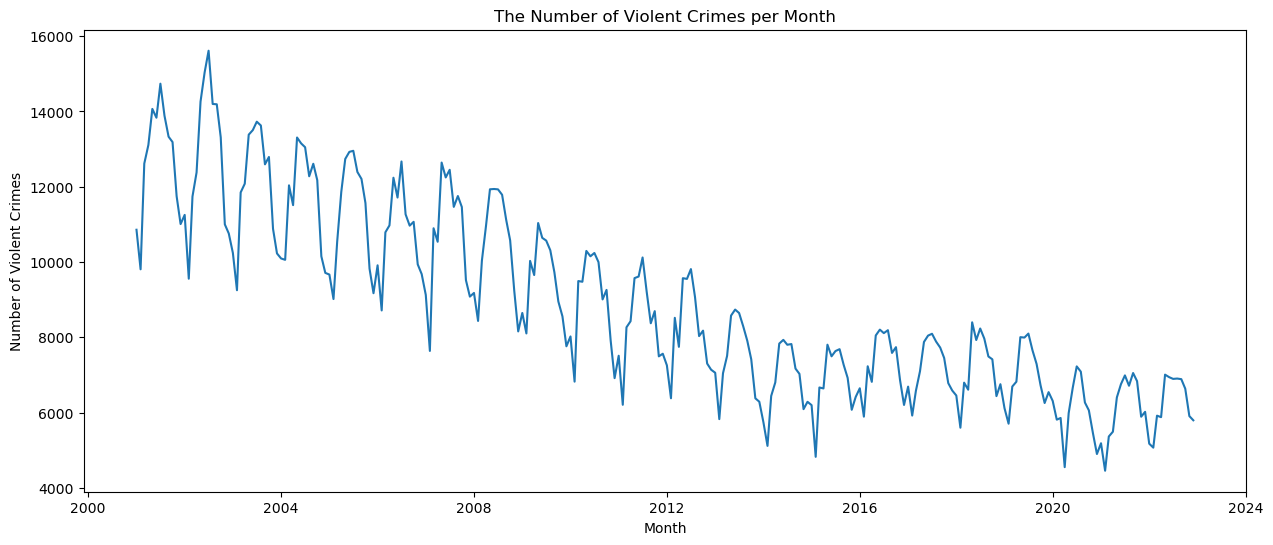

,vcrime_count,datetime
0,10856,2001-01-01
1,9805,2001-02-01
2,12615,2001-03-01
3,13109,2001-04-01
4,14067,2001-05-01
...,...,...
259,6902,2022-08-01
260,6886,2022-09-01
261,6633,2022-10-01
262,5905,2022-11-01


In [29]:
# let the time predictor be the month of the year
vcrimes['month']=vcrimes['Date'].dt.month
pd_month = vcrimes.groupby(['year', 'month'])[['ID']].count().reset_index().rename(columns={'ID':'vcrime_count'})
pd_month['datetime'] = pd_month.apply(lambda x: datetime.datetime(year=int(x['year']), month=int(x['month']), day=1), axis=1)
pd_month = pd_month.drop(['year', 'month'], axis=1)
# show the line chart of the number of violent crimes by month

plt.figure(figsize=(15, 6))
plt.plot(pd_month['datetime'], pd_month['vcrime_count'])
plt.title('The Number of Violent Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Violent Crimes')
plt.show()
pd_month.to_csv('Violent_Crime_Monthly.csv')
pd_month

In [30]:
# monthly data with weather
pd_month_weather = pd_month
pd_month_weather= pd_month_weather[(pd_month_weather['datetime']<'2017-12-01')& (pd_month_weather['datetime']>'2012-09-01')]
pd_month_weather['temperature'] = pd_hour_combine.groupby(['year', 'month'])['temperature'].mean().values
pd_month_weather['rain_dummy'] = pd_hour_combine.groupby(['year', 'month'])['rain_dummy'].mean().values
pd_month_weather['snow_dummy'] = pd_hour_combine.groupby(['year', 'month'])['snow_dummy'].mean().values
pd_month_weather['storm_dummy'] = pd_hour_combine.groupby(['year', 'month'])['storm_dummy'].mean().values
pd_month_weather['heavy_dummy'] = pd_hour_combine.groupby(['year', 'month'])['heavy_dummy'].mean().values
pd_month_weather['fog_dummy'] = pd_hour_combine.groupby(['year', 'month'])['fog_dummy'].mean().values
pd_month_weather.to_csv('Violent_Crime_Monthly_Weather.csv')
pd_month_weather

,vcrime_count,datetime,temperature,rain_dummy,snow_dummy,storm_dummy,heavy_dummy,fog_dummy
141,8175,2012-10-01,284.627857,0.094391,0.000000,0.005472,0.006840,0.008208
142,7301,2012-11-01,278.333361,0.031944,0.005556,0.001389,0.006944,0.091667
143,7137,2012-12-01,276.366259,0.081989,0.056452,0.000000,0.053763,0.064516
144,7056,2013-01-01,271.189405,0.073925,0.041667,0.000000,0.052419,0.026882
145,5824,2013-02-01,270.443026,0.025298,0.050595,0.000000,0.047619,0.047619
...,...,...,...,...,...,...,...,...
198,8092,2017-07-01,296.403590,0.059140,0.000000,0.033602,0.036290,0.036290
199,7884,2017-08-01,294.216030,0.063172,0.000000,0.022849,0.030914,0.032258
200,7725,2017-09-01,292.996979,0.027778,0.000000,0.002778,0.002778,0.083333
201,7449,2017-10-01,287.083612,0.127688,0.013441,0.010753,0.022849,0.013441


# Part 3 Hypothesis Testing

In [31]:
vcrime_weather.get(['temperature'])

,temperature
0,295.43
1,295.43
2,293.34
3,293.34
4,298.53
...,...
107386,283.39
107387,290.81
107388,287.65
107389,290.97


In this part, we will analyze how the temperature influences the crime rate.\
A hypothesis testing will be conducted to see whether our inference is reasonable or not.

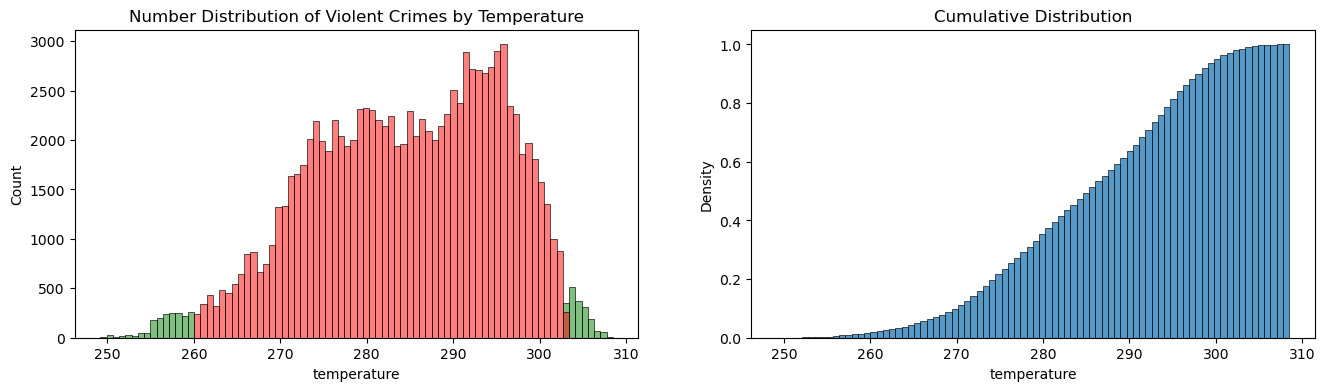

In [33]:
fig, axes = plt.subplots(1,2,figsize=[16,4])
vcrime_weather['group'] = vcrime_weather['temperature'].apply(lambda x: 'majority' if 260<x<303 else 'minority')
sns.histplot(data = vcrime_weather, x = "temperature", hue = 'group',
              palette=['red','green'], ax = axes[0], legend = False)
sns.histplot(data = vcrime_weather, x = "temperature", stat = 'density', cumulative = True, ax = axes[1])
axes[0].set_title('Number Distribution of Violent Crimes by Temperature');
axes[1].set_title('Cumulative Distribution');
vcrime_weather = vcrime_weather.drop('group',axis = 1)

##### We want to make an inference about temperature and crime number.
For the rest part, we will just focus on the `temperature interval [260, 300]`, and define the relative high temperature and low temperature interval.\
Before we set up our hypothesis, we first visualize `the crime number per hour under high temperature and low temperature`.

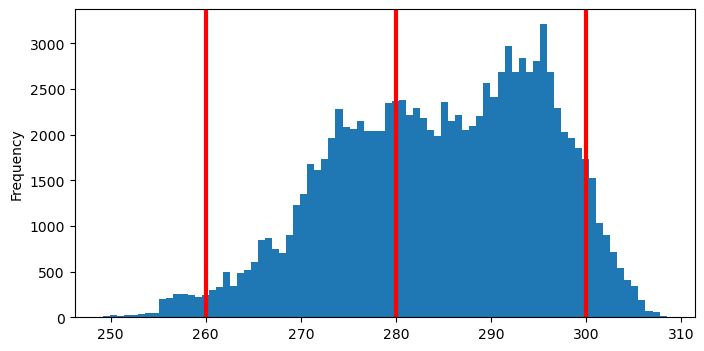

In [71]:
pd.DataFrame(vcrime_weather.temperature).plot(kind = 'hist', bins = 80, legend = False, figsize = [8,4]);
plt.axvline(x=260, c='r',lw=3)
plt.axvline(x=280, c='r',lw=3)
plt.axvline(x=300, c='r',lw=3)
plt.show()

Low temperature interval: `[260, 280]`\
High temperature interval: `[280, 300]`

In [94]:
low_temp = np.array([260, 280])
high_temp = np.array([280, 300])

In [75]:
target_df = pd_hour_combine[(pd_hour_combine.temperature >= 260) & (pd_hour_combine.temperature <= 300)].reset_index(drop = True)
target_df

,datetime,vcrime_count,vcrime_dummy,homicide_count,homicide_dummy,temperature,Daily_temp,MAver_temp_6h,temp_max,temp_min,rain_dummy,snow_dummy,storm_dummy,heavy_dummy,fog_dummy,year,month,time,weekday,date
0,2012-10-01 13:00:00,1,1,0.0,0.0,284.010000,284.552669,NaN,285.159182,284.01,0,0,0,0,0,2012,10,13,0,2012-10-01
1,2012-10-01 14:00:00,4,1,0.0,0.0,284.054691,284.552669,NaN,285.159182,284.01,0,0,0,0,0,2012,10,14,0,2012-10-01
2,2012-10-01 15:00:00,3,1,0.0,0.0,284.177412,284.552669,NaN,285.159182,284.01,0,0,0,0,0,2012,10,15,0,2012-10-01
3,2012-10-01 16:00:00,2,1,0.0,0.0,284.300133,284.552669,NaN,285.159182,284.01,0,0,0,0,0,2012,10,16,0,2012-10-01
4,2012-10-01 17:00:00,4,1,0.0,0.0,284.422855,284.552669,NaN,285.159182,284.01,0,0,0,0,0,2012,10,17,0,2012-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42169,2017-11-29 20:00:00,1,1,0.0,0.0,281.340000,279.479583,277.906667,287.040000,273.26,0,0,0,0,0,2017,11,20,2,2017-11-29
42170,2017-11-29 21:00:00,3,1,0.0,0.0,281.690000,279.479583,279.253333,287.040000,273.26,0,0,0,0,0,2017,11,21,2,2017-11-29
42171,2017-11-29 22:00:00,2,1,0.0,0.0,281.070000,279.479583,280.333333,287.040000,273.26,0,0,0,0,0,2017,11,22,2,2017-11-29
42172,2017-11-29 23:00:00,2,1,0.0,0.0,280.060000,279.479583,280.840000,287.040000,273.26,0,0,0,0,0,2017,11,23,2,2017-11-29


In [76]:
crime_temp = target_df.get(['vcrime_count', 'temperature'])
crime_temp.rename(columns = {'vcrime_count': 'crime_number'}, inplace = True)
crime_temp

,crime_number,temperature
0,1,284.010000
1,4,284.054691
2,3,284.177412
3,2,284.300133
4,4,284.422855
...,...,...
42169,1,281.340000
42170,3,281.690000
42171,2,281.070000
42172,2,280.060000


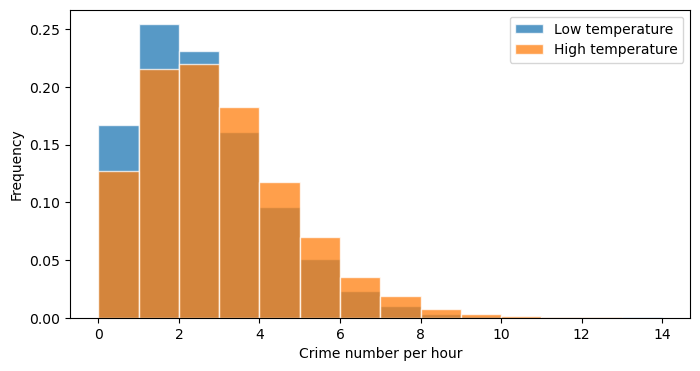

In [115]:
low_temp_crime = crime_temp[(crime_temp.temperature >= low_temp[0]) & (crime_temp.temperature < low_temp[1])].crime_number
high_temp_crime = crime_temp[(crime_temp.temperature >= high_temp[0]) & (crime_temp.temperature < high_temp[1])].crime_number

fig, ax = plt.subplots(figsize = [8,4])
low_temp_crime.plot(kind='hist', density=True, ax=ax,bins = np.arange(0,15,1), alpha=.75, ec='w')
high_temp_crime.plot(kind='hist', density=True, ax=ax, alpha=.75,bins = np.arange(0,15,1), ec='w')
plt.legend(['Low temperature', 'High temperature'])
plt.xlabel('Crime number per hour');
plt.show()


#### Does higher temperature has an association with more crime number per hour?

#### The null hypothesis is: In this temperature range, temperature has nothing to do with crime number.
#### The alternative hypothesis is: In this temperature range, higher temperature has an association with more crimes per hour.

The test statistic we'll use is

$$\text{mean crime per hour under high temperature} - \text{mean crime per hour under low temperature}$$

We calculate our observed `difference in mean`.

In [116]:
crime_temp

,crime_number,temperature
0,1,284.010000
1,4,284.054691
2,3,284.177412
3,2,284.300133
4,4,284.422855
...,...,...
42169,1,281.340000
42170,3,281.690000
42171,2,281.070000
42172,2,280.060000


In [82]:
low_temp_crime = crime_temp[(crime_temp.temperature >= low_temp[0]) & (crime_temp.temperature < low_temp[1])].crime_number.mean()
high_temp_crime = crime_temp[(crime_temp.temperature >= high_temp[0]) & (crime_temp.temperature < high_temp[1])].crime_number.mean()
observed_difference = (high_temp_crime - low_temp_crime) / 2
observed_difference

0.17304036077151075

We write a function to shuffle the column `temperature` in the dataframe `crime_temp`.\
We write a function to calculate the `sample tvd` from our shuffled dataframe.

In [85]:
def shuffle():
    shuffled_temperature = np.random.permutation(crime_temp.temperature)
    shuffled_crime_temp = crime_temp.assign(shuffled_temp = shuffled_temperature)
    return shuffled_crime_temp

def calculate_diff(df):
    low_temp_crime = df[(df.shuffled_temp >= low_temp[0]) & (df.shuffled_temp < low_temp[1])].crime_number.mean()
    high_temp_crime = df[(df.shuffled_temp >= high_temp[0]) & (df.shuffled_temp < high_temp[1])].crime_number.mean()
    difference = (high_temp_crime - low_temp_crime) / 2
    return difference


In [117]:
shuffle()

,crime_number,temperature,shuffled_temp
0,1,284.010000,286.532333
1,4,284.054691,282.600000
2,3,284.177412,281.630667
3,2,284.300133,296.840000
4,4,284.422855,297.260000
...,...,...,...
42169,1,281.340000,297.790000
42170,3,281.690000,286.090000
42171,2,281.070000,277.271333
42172,2,280.060000,287.572920


We run the simulation and plot.

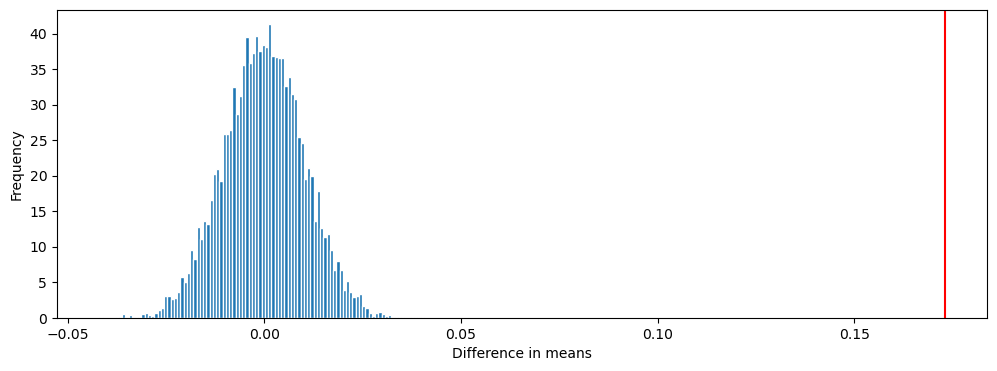

In [86]:
repetition = 10000
sample_diff = np.array([])

for i in range(0, repetition):
    diff = calculate_diff(shuffle())
    sample_diff = np.append(sample_diff, diff)

pd.DataFrame().assign(
    sample_diff = sample_diff
).plot(kind='hist', bins = 100, density=True, ec='w', figsize = [12,4], legend = False);
plt.axvline(x=observed_difference, c='red');
plt.xlabel('Difference in means')
plt.show()

P-value

In [90]:
p_value = np.count_nonzero(sample_diff >= observed_difference) / repetition
print(f'The p_value for this test equals {p_value}')

The p_value for this test equals 0.0


With p_value = 0, we can now formally reject the null hypothesis and accept the alternative.\
From the graph above, we can also argue that higher temperature must have an association with more crimes.\

First we sort by `temperature` in ascending order.

In [41]:
crime_temp.sort_values(by = 'temperature', inplace = True)
crime_temp

,crime_number,temperature
9395,1,260.000000
10016,2,260.000000
17271,0,260.012667
17288,0,260.019000
30504,0,260.020000
...,...,...
20976,1,295.000000
27603,2,295.000000
27947,2,295.000000
27726,1,295.000000


#### But actually each single point doesn't make sense.
In order to better calculate the gradients, we apply the `rolling` method.

In [42]:
gradient_crime = np.array([])
gradient_temp = np.array([])

rolling_crime = crime_temp['crime_number'].rolling(5000, center = True, min_periods=3000).mean()
gradient_crime = np.append(gradient_crime, rolling_crime)

rolling_temp = crime_temp['temperature'].rolling(5000, center = True, min_periods=3000).mean()
gradient_temp = np.append(gradient_temp, rolling_temp)

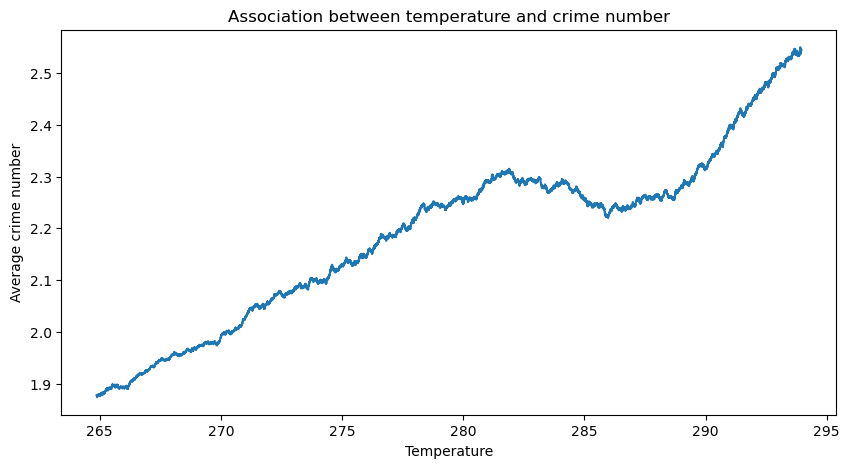

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(gradient_temp, gradient_crime);
plt.title('Association between temperature and crime number')
plt.xlabel('Temperature')
plt.ylabel('Average crime number')
plt.show()

Then we calculate the gradients.

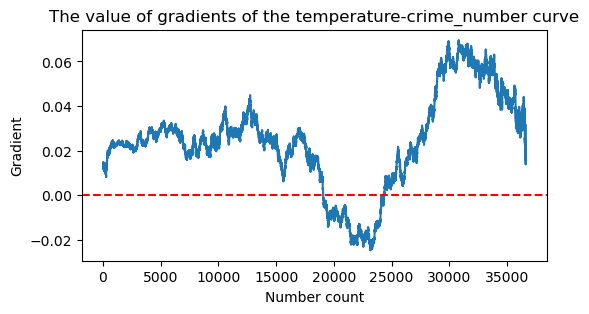

In [86]:
gradients = np.array([])

for i in range(1, len(gradient_crime)-1):
    gradient = (gradient_crime[i] - gradient_crime[i-1]) / (gradient_temp[i] - gradient_temp[i-1])
    gradients = np.append(gradients, gradient)

rolling_gradients = np.array([])
rolling_gradient = pd.DataFrame(gradients).rolling(3000, center = True, min_periods=1000).mean()
rolling_gradients = np.append(rolling_gradients, rolling_gradient)

plt.figure(figsize=(6, 3))
plt.plot(range(0, len(rolling_gradients)), rolling_gradients);
plt.title('The value of gradients of the temperature-crime_number curve')
plt.xlabel('Number count')
plt.ylabel('Gradient')
plt.axhline(y = 0, c = 'r', ls='--')
plt.show()

In [102]:
print(f"The proportion of gradients that is non-negative is {np.count_nonzero(gradients >= 0) / gradients.shape[0]} if we don't roll the gradients.")
print(f"The proportion of gradients that is non-negative is {np.count_nonzero(rolling_gradients >= 0 ) / rolling_gradients.shape[0]} if we roll the gradients.")

The proportion of gradients that is non-negative is 0.5837771405161819 if we don't roll the gradients.
The proportion of gradients that is non-negative is 0.8563430288133279 if we roll the gradients.


# Part 4 Predictive Modeling

# Time Series Model

predict the number of violent crimes per month using Arima model

Arima model is a time series model that can combine the autoregressive model (AR), the moving average model (MA), and the integrated model (I).
The ARIMA model is suitable for time series data with trend and seasonality.

In [185]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima.arima import auto_arima
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error

pd_month = pd.read_csv('Violent_Crime_Monthly.csv')
# split the data into training and testing sets
train_month = pd_month[pd_month['datetime'] < '2021-01-01']
test_month = pd_month[pd_month['datetime'] >= '2021-01-01']
print(train_month.shape, test_month.shape)
test_month

(240, 3) (24, 3)


,Unnamed: 0,vcrime_count,datetime
240,240,5183,2021-01-01
241,241,4453,2021-02-01
242,242,5362,2021-03-01
243,243,5490,2021-04-01
244,244,6401,2021-05-01
245,245,6753,2021-06-01
246,246,6986,2021-07-01
247,247,6711,2021-08-01
248,248,7049,2021-09-01
249,249,6833,2021-10-01


Two years for testing and the rest for training.

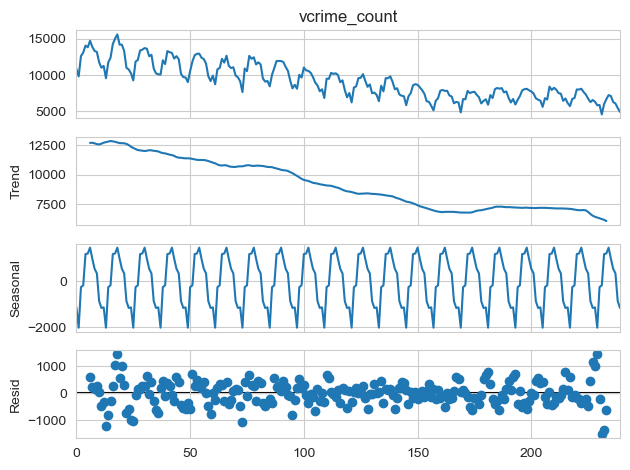

In [186]:
from statsmodels.tsa.seasonal import seasonal_decompose

# check the stationarity of the time series
decomposed = seasonal_decompose(train_month['vcrime_count'], model='additive', period=12)
x = decomposed.plot()

The data has obvious seasonality and trend. We need to see the autocorrelation plot and the lag plot.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

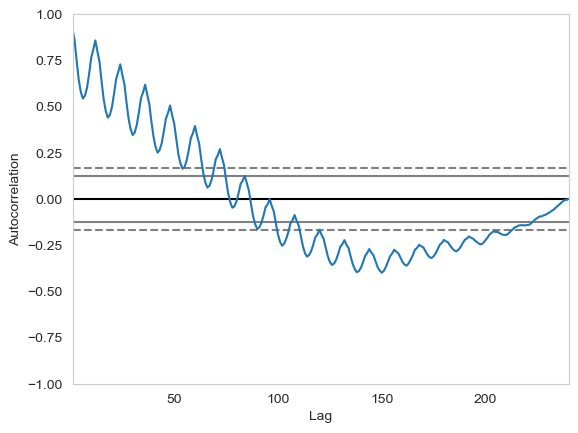

In [187]:
# draw the autocorrelation plot. Auto-correlation is the correlation of a signal with a delayed copy of itself as a function of delay.The higher the autocorrelation at a specific lag, the more likely the data is to be dependent on that lag.
autocorrelation_plot(train_month['vcrime_count'])

<Axes: xlabel='y(t)', ylabel='y(t + 12)'>

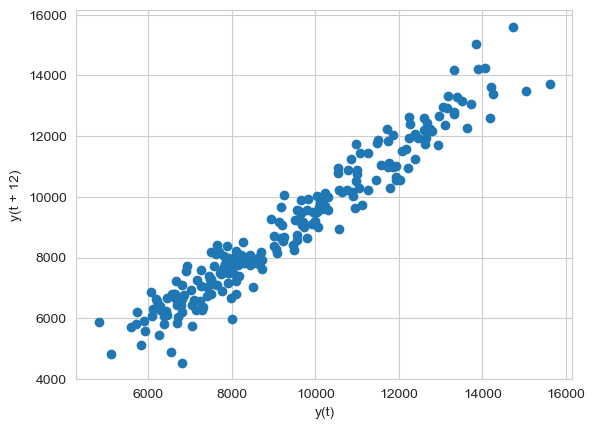

In [188]:
# draw the lag 12 plot, which have a strong correlation with the previous 12 months
pd.plotting.lag_plot(train_month['vcrime_count'], lag=12)

In [236]:
# calculate the correlation between the current month and the previous 12 month
train_month['vcrime_count'].corr(train_month['vcrime_count'].shift(12))

0.9692379874867887

lag plot shows that the data has a strong correlation with the previous 12 months.

In [238]:
# 检验是否平稳
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_month['vcrime_count'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.501361
p-value: 0.891751


P is greater than 0.05, so the data is not stationary.

In [239]:
# 检查差分后的数据是否平稳
result = adfuller(train_month['vcrime_count'].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -3.797464
p-value: 0.002933


The data is stationary after differencing.

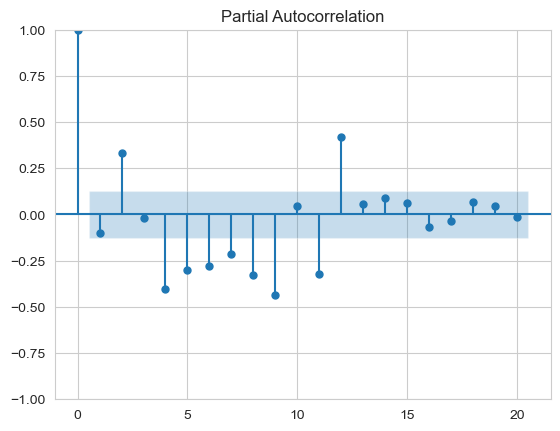

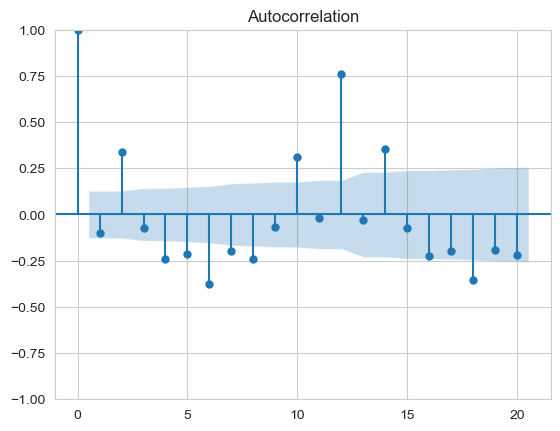

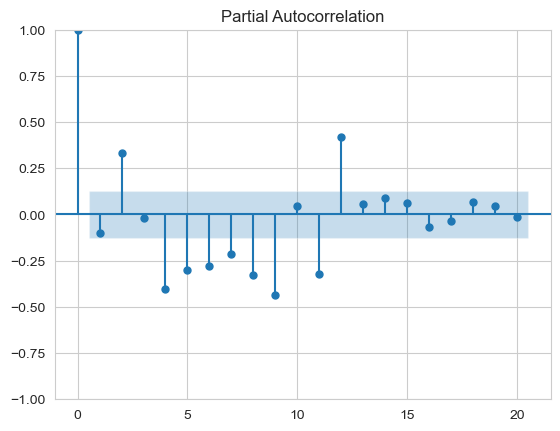

In [209]:
# 看一下一阶差分后的acf和pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(train_month['vcrime_count'].diff().dropna(), lags=20)
plot_pacf(train_month['vcrime_count'].diff().dropna(), lags=20)

ACF means the correlation between the current value and the previous value at different lags.\
PACF means the correlation between the current value and the previous value at different lags, excluding the effect of the intermediate values.
They are used to determine the parameters of the ARIMA model.
Generally, the ACF plot will decrease exponentially, and the PACF plot will have a sharp drop after a certain lag.

In [193]:
# 用周期性ARIMA模型预测
model_month = pm.auto_arima(train_month['vcrime_count'], start_p=0, d=1, start_q=0, max_p=3,max_d=2,max_q=4,
                         start_P=0, D=1, start_Q=0, max_P=3, max_D=2, max_Q=4, m=12, seasonal=True,trace=True,stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3537.894, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3468.130, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3421.503, Time=0.29 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3490.030, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3423.402, Time=0.59 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3423.327, Time=1.36 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3453.795, Time=0.15 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3416.351, Time=1.05 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=3423.674, Time=2.10 sec
 ARIMA(0,1,1)(1,1,3)[12]             : AIC=inf, Time=9.74 sec
 ARIMA(0,1,1)(0,1,3)[12]             : AIC=3415.644, Time=3.67 sec
 ARIMA(0,1,1)(0,1,4)[12]             : AIC=3417.532, Time=5.78 sec
 ARIMA(0,1,1)(1,1,4)[12]             : AIC=inf, Time=9.71 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=3449.486, Time=1.68 sec
 ARIMA(1,1,1)(0,1,3)[12]     

In [194]:
# select the best model
model_month.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                          y   No. Observations:                  240
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2, 3], 12)   Log Likelihood               -1699.056
Date:                                    Fri, 19 Apr 2024   AIC                           3410.111
Time:                                            17:37:44   BIC                           3430.661
Sample:                                                 0   HQIC                          3418.403
                                                    - 240                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3219      0.092      3.488      0.000       0.141       0.503
ma.L1         -0.7673      0.071    -10.732      0.000      -0.907      -0.627
ma.S.L12      -0.7028      0.076     -9.272      0.000      -0.851      -0.554
ma.S.L24      -0.1158      0.081     -1.431      0.152      -0.274       0.043
ma.S.L36       0.2169      0.074      2.945      0.003       0.073       0.361
sigma2      1.652e+05   1.34e+04     12.350      0.000    1.39e+05    1.91e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                14.97
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                            -0.44
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

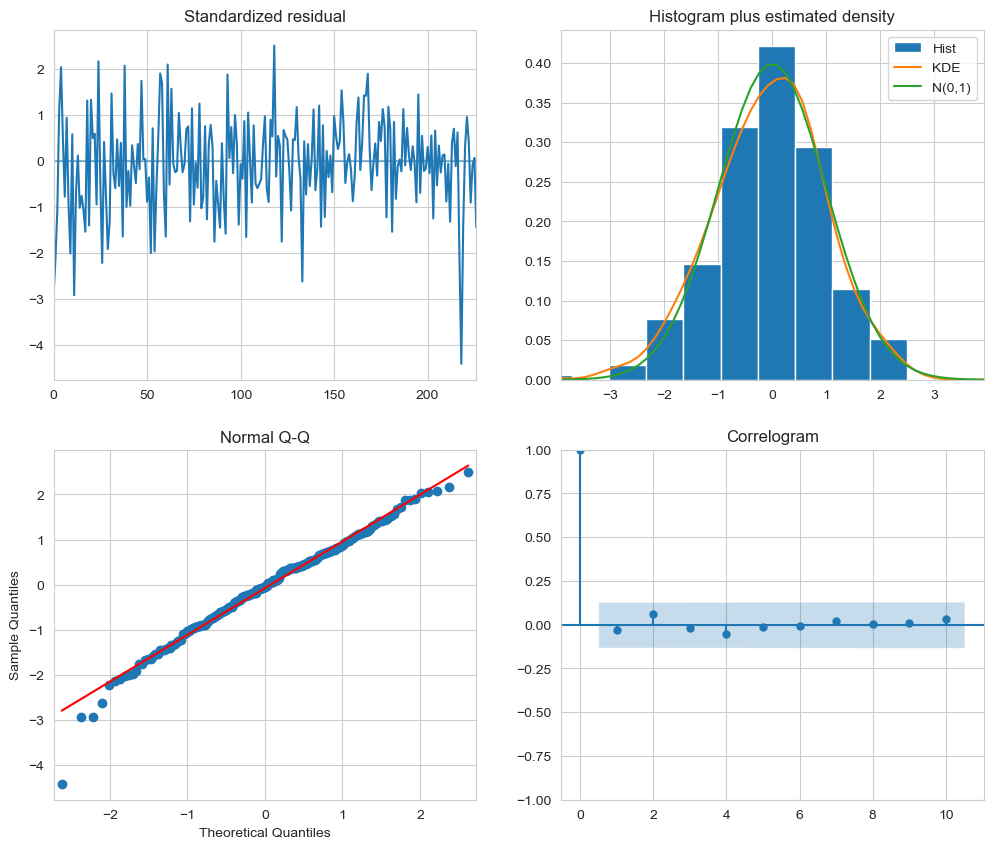

In [241]:
# check whether the residuals are white noise
model_month.plot_diagnostics(figsize=(12, 10))
plt.show()

 Both the histogram and the Q-Q plot show that the residuals are normally distributed. This corresponds to the large number theorems, so there's no tendency or seasonality in the residuals.\
The residuals are white noise.

The correlation between the residuals and the lagged residuals is close to zero.

In [197]:
# predict the number of violent crimes per month
prediction_month = pd.DataFrame(model_month.predict(n_periods=len(test_month)), index=test_month.index)
prediction_month.columns = ['vcrime_count']
prediction_month['datetime'] = test_month['datetime'].values
train_month.set_index('datetime', inplace=True)
test_month.set_index('datetime', inplace=True)
prediction_month.set_index('datetime', inplace=True)

prediction_month

,vcrime_count
datetime,
2021-01-01,5085.079712
2021-02-01,4485.774796
2021-03-01,5254.922614
2021-04-01,4870.636745
2021-05-01,6253.290501
2021-06-01,6342.466986
2021-07-01,6606.244828
2021-08-01,6453.345955
2021-09-01,5948.633474


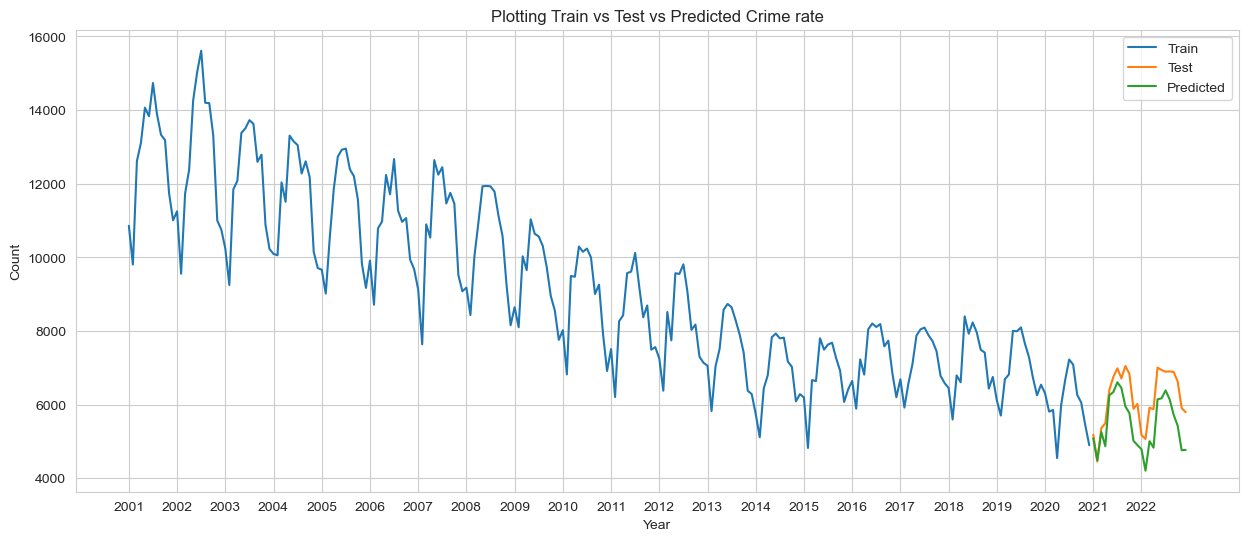

In [198]:
# plot the predictions
plt.figure(figsize=(15, 6))
plt.xticks(np.arange(0, len(train_month)+len(test_month), 12), np.arange(2001, 2023, 1))
plt.plot(train_month['vcrime_count'], label='Train')
plt.plot(test_month['vcrime_count'], label='Test')
plt.plot(prediction_month, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Plotting Train vs Test vs Predicted Crime rate')
plt.legend()
plt.show()

We can see that the ARIMA model can predict the number of violent crimes per month well.

In [83]:
# 加上天气预报的数据来进行预测
pd_month_weather = pd.read_csv('Violent_Crime_Monthly_Weather.csv')
# 把temperature, rain_dummy, snow_dummy, storm_dummy, heavy_dummy, fog_dummy的数据后移12个月
pd_month_weather[['temperature', 'rain_dummy', 'snow_dummy', 'storm_dummy', 'heavy_dummy', 'fog_dummy']] = pd_month_weather[['temperature', 'rain_dummy', 'snow_dummy', 'storm_dummy', 'heavy_dummy', 'fog_dummy']].shift(12)
pd_month_weather = pd_month_weather.dropna().reset_index()
pd_month_weather

,index,Unnamed: 0,vcrime_count,datetime,temperature,rain_dummy,snow_dummy,storm_dummy,heavy_dummy,fog_dummy
0,12,153,7412,2013-10-01,284.627857,0.094391,0.000000,0.005472,0.006840,0.008208
1,13,154,6377,2013-11-01,278.333361,0.031944,0.005556,0.001389,0.006944,0.091667
2,14,155,6286,2013-12-01,276.366259,0.081989,0.056452,0.000000,0.053763,0.064516
3,15,156,5743,2014-01-01,271.189405,0.073925,0.041667,0.000000,0.052419,0.026882
4,16,157,5113,2014-02-01,270.443026,0.025298,0.050595,0.000000,0.047619,0.047619
5,17,158,6440,2014-03-01,273.247941,0.024194,0.116935,0.000000,0.102151,0.006720
6,18,159,6799,2014-04-01,280.875064,0.104167,0.005556,0.020833,0.027778,0.011111
7,19,160,7831,2014-05-01,289.172166,0.045699,0.000000,0.013441,0.020161,0.001344
8,20,161,7930,2014-06-01,292.861713,0.212500,0.000000,0.027778,0.031944,0.005556
9,21,162,7800,2014-07-01,295.815547,0.106183,0.000000,0.013441,0.018817,0.006720


In [84]:
# split the data into training and testing sets
train_month_weather = pd_month_weather[pd_month_weather['datetime'] < '2017-01-01']
test_month_weather = pd_month_weather[pd_month_weather['datetime'] >= '2017-01-01']
print(train_month_weather.shape, test_month_weather.shape)

(39, 10) (11, 10)


In [85]:
# see if the data is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_month_weather['vcrime_count'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.895852
p-value: 0.000036


In [86]:
# 用周期性ARIMA模型预测
from pmdarima.arima import auto_arima
import pmdarima as pm
model_month_weather = pm.auto_arima(train_month_weather['vcrime_count'], X=train_month_weather[['temperature', 'rain_dummy', 'snow_dummy', 'storm_dummy', 'heavy_dummy', 'fog_dummy']], seasonal=True, m=12,start_p=0, start_q=1, max_p=5, max_q=5, max_P=5, max_Q=5, stepwise=True, trace=True,test='adf', start_P=0, start_Q=0,d=0, D=0,max_D=3, max_d=3)

Performing stepwise search to minimize aic
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=612.362, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=601.650, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=606.728, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=608.413, Time=0.03 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=605.105, Time=0.22 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=612.374, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.28 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.807 seconds


In [87]:
# select the best model
model_month_weather.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   39
Model:                        SARIMAX   Log Likelihood                -292.825
Date:                Sun, 21 Apr 2024   AIC                            601.650
Time:                        14:28:51   BIC                            614.958
Sample:                             0   HQIC                           606.425
                                 - 39                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -7738.5299   4037.450     -1.917      0.055   -1.57e+04     174.726
temperature    50.1657     14.928      3.361      0.001      20.908      79.423
rain_dummy   1716.1653   1046.068      1.641      0.101    -334.090    3766.421
snow_dummy   1291.1946   1393.980      0.926      0.354   -1440.957    4023.346
storm_dummy  4.583e+04   1.22e+04      3.757      0.000    2.19e+04    6.97e+04
heavy_dummy   611.1053   3361.182      0.182      0.856   -5976.690    7198.900
fog_dummy   -1597.6549   4001.438     -0.399      0.690   -9440.328    6245.019
sigma2       1.951e+05      6e+04      3.254      0.001    7.76e+04    3.13e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.64   Prob(JB):                         0.85
Heteroskedasticity (H):               1.45   Skew:                             0.13
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
# the variables of rain_dummy, snow_dummy, storm_dummy, heavy_dummy, and fog_dummy are not significant, so we can remove them
model_month_weather = pm.auto_arima(train_month_weather['vcrime_count'], X=train_month_weather[['temperature']], seasonal=True, m=12,start_p=0, start_q=1, max_p=5, max_q=5, max_P=5, max_Q=5, stepwise=True, trace=True,test='adf', start_P=0, start_Q=0,d=0, D=0,max_D=3, max_d=3)
model_month_weather.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=616.890, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=591.553, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=586.568, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=619.762, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=597.822, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=588.400, Time=0.35 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=587.514, Time=0.18 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=593.048, Time=0.11 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=588.784, Time=0.33 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=588.660, Time=0.17 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=592.536, Time=0.28 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=in

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   39
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -288.654
Date:                            Sun, 21 Apr 2024   AIC                            585.307
Time:                                    14:28:56   BIC                            591.962
Sample:                                         0   HQIC                           587.695
                                             - 39                                         
Covariance Type:                              opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature    25.0054      1.419     17.625      0.000      22.225      27.786
ar.L1           0.5679      0.140      4.064      0.000       0.294       0.842
ar.S.L12        0.7861      0.087      9.018      0.000       0.615       0.957
sigma2       1.157e+05   3.38e+04      3.428      0.001    4.96e+04    1.82e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 1.12
Prob(Q):                              0.77   Prob(JB):                         0.57
Heteroskedasticity (H):               1.35   Skew:                            -0.31
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

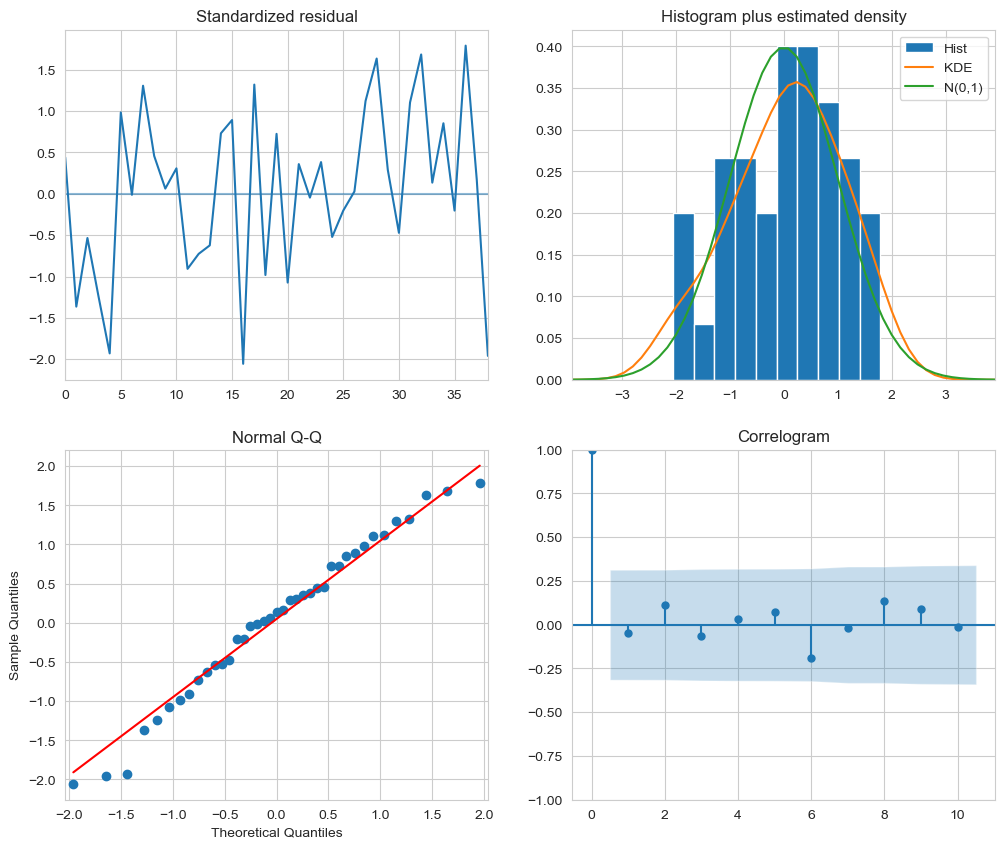

In [89]:
# check whether the residuals are white noise
model_month_weather.plot_diagnostics(figsize=(12, 10))
plt.show()

The residuals are white noise according to the histogram and the Q-Q plot.
The correlation between the residuals and the lagged residuals is a little bit high.

In [90]:
# predict the number of violent crimes per month
prediction_month_weather = pd.DataFrame(model_month_weather.predict(n_periods=len(test_month_weather), X=test_month_weather[['temperature']]), index=test_month_weather.index)
prediction_month_weather.columns = ['vcrime_count']
prediction_month_weather['datetime'] = test_month_weather['datetime'].values
train_month_weather.set_index('datetime', inplace=True)
test_month_weather.set_index('datetime', inplace=True)
prediction_month_weather.set_index('datetime', inplace=True)
prediction_month_weather


,vcrime_count
datetime,
2017-01-01,6475.818997
2017-02-01,6156.795139
2017-03-01,7234.625289
2017-04-01,6857.659227
2017-05-01,7908.312851
2017-06-01,8122.020791
2017-07-01,7976.990660
2017-08-01,8063.384045
2017-09-01,7536.388813


Text(0.5, 1.0, 'Plotting Train vs Test vs Predicted Crime rate')

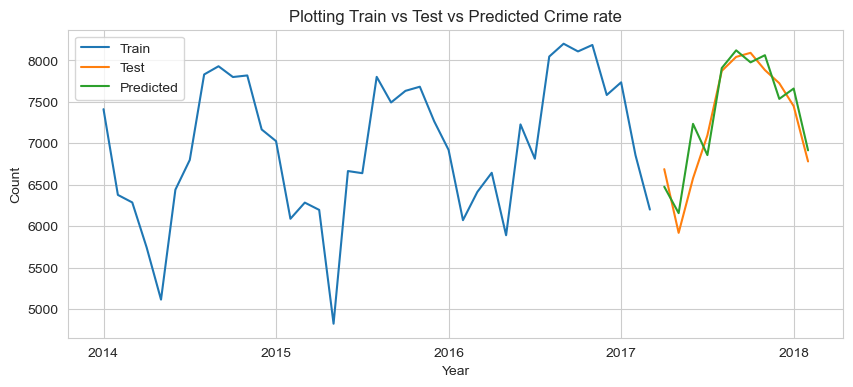

In [92]:
# plot the predictions
plt.figure(figsize=(10, 4))
plt.xticks(np.arange(0, len(train_month_weather)+len(test_month_weather), 12), np.arange(2014, 2019, 1))
plt.plot(train_month_weather['vcrime_count'], label='Train')
plt.plot(test_month_weather['vcrime_count'], label='Test')
plt.plot(prediction_month_weather, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Count')
# 把label放在最佳位置
plt.legend(loc='best')
plt.title('Plotting Train vs Test vs Predicted Crime rate')

The ARIMA model with weather data can predict the number of violent crimes per month well. 
Both of the time series models predicts the tendency well, with some fluctuations and lagging. We can explore more features as regressors to improve the model. This is also because the 12 months' lag, which gives a prediction only for the next year. For longer predictions, we need usr our prediction to predict the next year. So the error can accumulate.


# Predict the number of violent crimes per hour using XGBoost and Possion Regression model

In [38]:
pd_hour_combine = pd.read_csv('Violent_Crime_Hourly.csv')
# Exclude outliers of Violent crime count variables
print(pd.DataFrame(pd_hour_combine[['vcrime_count']].describe(percentiles=[0.99]).T))
pd_hour_combine['vcrime_count'] = pd_hour_combine['vcrime_count'].where(pd_hour_combine['vcrime_count']<=8, 8)

                count      mean      std  min  50%  99%    max
vcrime_count  45252.0  2.373177  2.02076  0.0  2.0  8.0  103.0


In [39]:
for xday in list(set(pd_hour_combine['month'])):
    pd_hour_combine['month'+str(xday)] = 0
    pd_hour_combine['month'+str(xday)] = pd_hour_combine['month'+str(xday)].where(pd_hour_combine['month']!=xday,1)
    
for xday in list(set(pd_hour_combine['weekday'])):
    pd_hour_combine['weekday'+str(xday)] = 0
    pd_hour_combine['weekday'+str(xday)] = pd_hour_combine['weekday'+str(xday)].where(pd_hour_combine['weekday']!=xday,1)
    
for xday in list(set(pd_hour_combine['time'])):
    pd_hour_combine[str(xday)+':00'] = 0
    pd_hour_combine[str(xday)+':00'] = pd_hour_combine[str(xday)+':00'].where(pd_hour_combine['time']!=xday,1)  

In [40]:
# add time series variables
month_name = {'month1': 'Jan', 'month2':'Feb', 'month3':'Mar', 'month4':'Apr', 'month5':'May', 'month6':'Jun',
             'month7':'July', 'month8':'Aug', 'month9':'Sep', 'month10':'Oct', 'month11':'Nov', 'month12':'Dec'}
weekday_name = {'weekday0': 'Sun', 'weekday1':'Mon', 'weekday2':'Tue', 'weekday3':'Wed', 'weekday4':'Thu',
                'weekday5':'Fri', 'weekday6':'Sat'}
pd_hour_combine = pd_hour_combine.rename(columns=month_name).rename(columns=weekday_name)

pd_hour_combine

,Unnamed: 0,datetime,vcrime_count,vcrime_dummy,homicide_count,homicide_dummy,temperature,Daily_temp,MAver_temp_6h,temp_max,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
0,0,2012-10-01 13:00:00,1,1,0.0,0.0,284.010000,284.552669,NaN,285.159182,...,0,0,0,0,0,0,0,0,0,0
1,1,2012-10-01 14:00:00,4,1,0.0,0.0,284.054691,284.552669,NaN,285.159182,...,1,0,0,0,0,0,0,0,0,0
2,2,2012-10-01 15:00:00,3,1,0.0,0.0,284.177412,284.552669,NaN,285.159182,...,0,1,0,0,0,0,0,0,0,0
3,3,2012-10-01 16:00:00,2,1,0.0,0.0,284.300133,284.552669,NaN,285.159182,...,0,0,1,0,0,0,0,0,0,0
4,4,2012-10-01 17:00:00,4,1,0.0,0.0,284.422855,284.552669,NaN,285.159182,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45247,45247,2017-11-29 20:00:00,1,1,0.0,0.0,281.340000,279.479583,277.906667,287.040000,...,0,0,0,0,0,0,1,0,0,0
45248,45248,2017-11-29 21:00:00,3,1,0.0,0.0,281.690000,279.479583,279.253333,287.040000,...,0,0,0,0,0,0,0,1,0,0
45249,45249,2017-11-29 22:00:00,2,1,0.0,0.0,281.070000,279.479583,280.333333,287.040000,...,0,0,0,0,0,0,0,0,1,0
45250,45250,2017-11-29 23:00:00,2,1,0.0,0.0,280.060000,279.479583,280.840000,287.040000,...,0,0,0,0,0,0,0,0,0,1


In [41]:
# split the data into training and testing sets
dummy_list=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct',
             'Nov', 'Dec', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', '0:00',
             '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00',
             '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00',
             '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']
pd_train = pd_hour_combine[pd_hour_combine['datetime']<'2016-01-01 00:00:00'].set_index('datetime').dropna()
pd_test = pd_hour_combine[pd_hour_combine['datetime']>='2016-01-01 00:00:00'].set_index('datetime').dropna()
# 用天气预报的数据来进行预测，先说明天气预报的数据是很准确的，可以精确到小时，所以我们可以用天气预报的数据来进行预测
X_train = pd_train[['temperature','rain_dummy'] + dummy_list]
y_train = pd_train['vcrime_count']
X_test = pd_test[['temperature','rain_dummy'] + dummy_list]
y_test = pd_test['vcrime_count']



In [42]:
from sklearn.linear_model import PoissonRegressor
import xgboost as xgb
from xgboost import plot_importance, plot_tree
classifiers = {
    "XGBoost": xgb.XGBClassifier(objective='count:poisson'),
    "Poisson": PoissonRegressor()
}

In [45]:
from sklearn.model_selection import GridSearchCV

# XGB Classifier
XGB_params = {'n_estimators':[100, 200], 'max_depth':[2, 4], 'min_child_weight':[6], 'learning_rate':[0.2, 0.3], 'objective':['count:poisson']}
grid_XGB = GridSearchCV(xgb.XGBClassifier(), XGB_params)
grid_XGB.fit(X_train, y_train)
# XGB best estimator
XGB_clf = grid_XGB.best_estimator_
# XGB best parameters
XGB_clf.get_params()

{'objective': 'multi:softprob',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 2,
 'max_leaves': None,
 'min_child_weight': 6,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [46]:
# XGB best parameters
xgb_clf=xgb.XGBClassifier(objective='count:poisson', max_depth=4, min_child_weight=6, learning_rate=0.2, n_estimators=200)
xgb_model = xgb_clf.fit(X_train, y_train)

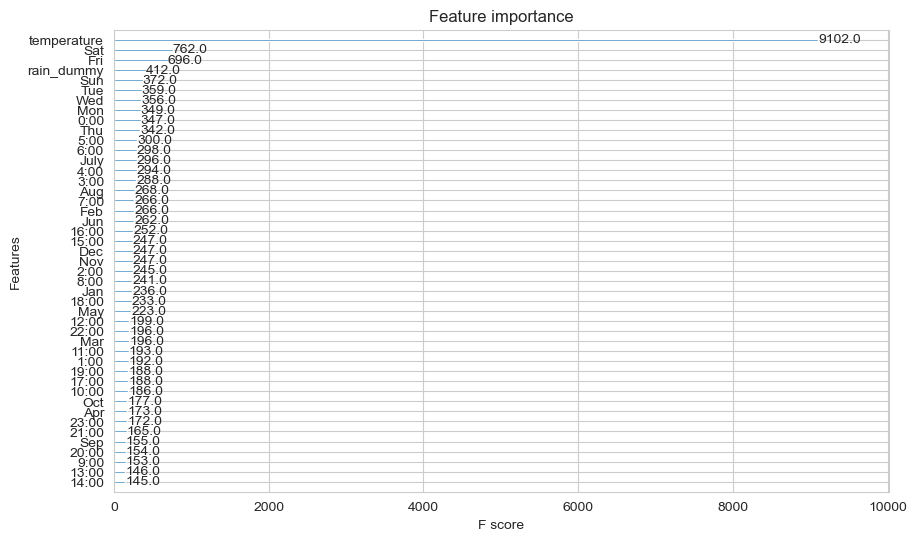

In [47]:
# show the feature importance
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_importance(xgb_model, ax=ax)
plt.show()

In [48]:
# Poisson Regression
poisson_reg_params = {"alpha": [0,1,2], 'max_iter': [100, 200, 300], 'tol': [0.001, 0.01, 0.1], 'verbose': [0, 1]}
grid_ps_reg = GridSearchCV(PoissonRegressor(), poisson_reg_params)
grid_ps_reg.fit(X_train, y_train)
poisson_reg_params = grid_ps_reg.best_estimator_
poisson_reg_params.get_params()

{'alpha': 0,
 'fit_intercept': True,
 'max_iter': 300,
 'solver': 'lbfgs',
 'tol': 0.001,
 'verbose': 0,
 'warm_start': False}

In [49]:
glm = PoissonRegressor(alpha=0, max_iter=300, tol=0.001, verbose=0)
glm_model = glm.fit(X_train, y_train)

<Axes: >

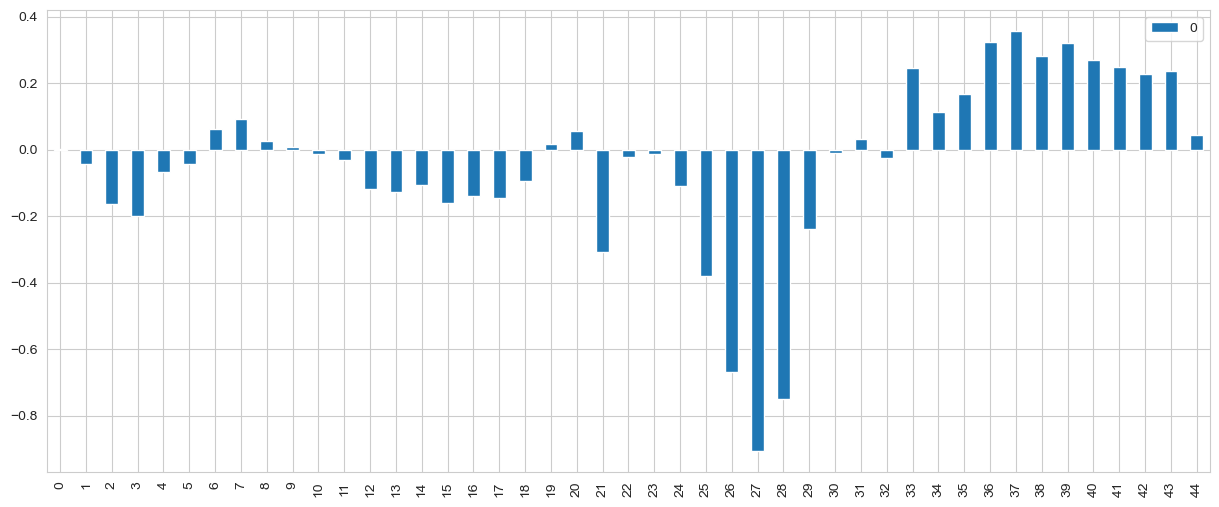

In [57]:
# show the feature importance,use plot
pd.DataFrame(glm_model.coef_).plot(kind='bar', figsize=(15, 6))

# Validation and Evaluation

In [51]:
XGB_poisson = pd.DataFrame(xgb_model.predict(X_test)).rename(columns={0:'XGB Poisson'})
pd_validation = pd_test['vcrime_count'].reset_index().join(XGB_poisson)
pd_validation['xgb_mse'] = (pd_validation['XGB Poisson'] - pd_validation['vcrime_count']).apply(lambda x: x**2)
pd_validation['xgb_mae'] = (pd_validation['XGB Poisson'] - pd_validation['vcrime_count']).apply(lambda x: abs(x))
poisson_regression = pd.DataFrame(glm.fit(X_train, y_train).predict(X_test)).rename(columns={0:'Poisson Regression'})
pd_validation = pd_validation.join(poisson_regression)
pd_validation['poisson_mse'] = (pd_validation['Poisson Regression'] - pd_validation['vcrime_count']).apply(lambda x: x**2)
pd_validation['poisson_mae'] = (pd_validation['Poisson Regression'] - pd_validation['vcrime_count']).apply(lambda x: abs(x))
pd_validation

,datetime,vcrime_count,XGB Poisson,xgb_mse,xgb_mae,Poisson Regression,poisson_mse,poisson_mae
0,2016-01-01 00:00:00,8,1,49,7,1.441457,43.014482,6.558543
1,2016-01-01 01:00:00,8,1,49,7,1.918917,36.979568,6.081083
2,2016-01-01 02:00:00,8,1,49,7,1.932384,36.815962,6.067616
3,2016-01-01 03:00:00,6,1,25,5,1.756419,18.007983,4.243581
4,2016-01-01 04:00:00,4,0,16,4,1.340778,7.071463,2.659222
...,...,...,...,...,...,...,...,...
16772,2017-11-29 20:00:00,1,3,4,2,2.588322,2.522767,1.588322
16773,2017-11-29 21:00:00,3,3,0,0,2.533786,0.217355,0.466214
16774,2017-11-29 22:00:00,2,3,1,1,2.551445,0.304091,0.551445
16775,2017-11-29 23:00:00,2,1,1,1,2.105269,0.011082,0.105269


In [52]:
pd_validation['datetime'] = pd.to_datetime(pd_validation['datetime'])
pd_validation[['xgb_mse', 'poisson_mse']].mean()

xgb_mse        3.119270
poisson_mse    2.592572
dtype: float64

In [53]:
pd_validation[['xgb_mae', 'poisson_mae']].mean()

xgb_mae        1.309769
poisson_mae    1.263888
dtype: float64

Text(0.5, 1.0, 'Violent Crimes vs Poisson Regression Prediction')

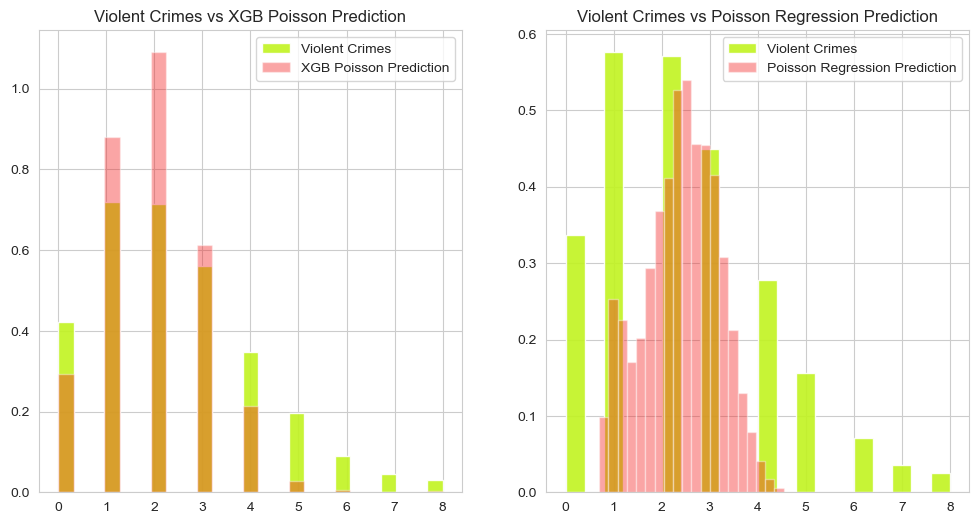

In [54]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].hist(pd_validation['vcrime_count'], bins=25, color="#C1F320", alpha=.9,density=True)
ax[0].hist(pd_validation['XGB Poisson'],  bins=25, color="#F32020", alpha=.4,density=True)
ax[0].legend(["Violent Crimes", "XGB Poisson Prediction"])
ax[0].set_title("Violent Crimes vs XGB Poisson Prediction")
ax[1].hist(pd_validation['vcrime_count'], bins=20, color="#C1F320", alpha=.9,density=True)
ax[1].hist(pd_validation['Poisson Regression'],  bins=20, color="#F32020", alpha=.4,density=True)
ax[1].legend(["Violent Crimes", "Poisson Regression Prediction"])
ax[1].set_title("Violent Crimes vs Poisson Regression Prediction")

We can see that according to the validation results, the XGBoost model can predict the exact number of violent crimes better than the Poisson regression model on the exaxt number of crimes. Poisson regression has a continuous distribution of violent crimes and low mse and mae when compared with XGB, which shows a relatively concentrated distribution of violent crimes.

We just show the predicted distribution of violent crimes by XGBoost and Poisson regression models. It is because the predicted distribution of violent crimes is more important than the exact number of violent crimes. What's more, the mse and mae of both models are so large that it's hard to predict the exact number of violent crimes in an hour,but using the predicted distribution of violent crimes can help the police department to allocate police resources more effectively. As a result, we can then predict the likelihood of a violent crime happening per hour using other models.

# Predict the likelihood of a violent crime happening per hour using Logistic regression, Decision Tree, and XGBoost models

### Binary Classification
#### Data Training
To predict the probability of violent crimes, I would like to transform the count variable of violent crimes into a binary variable.  
Let's take a look at the distribution of violent crimes distribution data, only a small portion of hours have no violent crimes at all. As a result, we need to undersample data. I notice that the number of hours with no violent crimes is comparable with the number of hours with more than 4 crimes. I take advantage of this feature and keep the hours with more than 4 violent crimes. 

<Axes: ylabel='Frequency'>

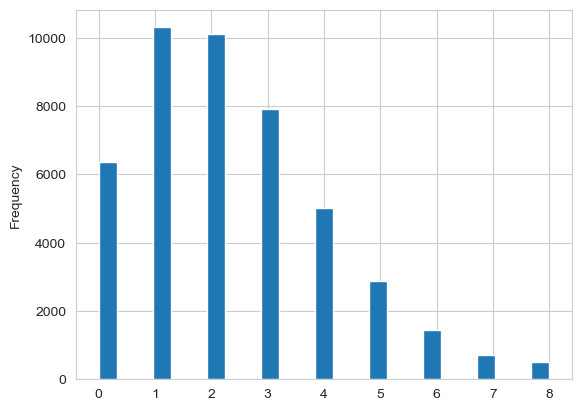

In [58]:
pd_hour_combine['vcrime_count'].plot(kind='hist', bins=25)

In [59]:
# check the data size of no violent crimes and more than 4 violent crimes
binary_data = pd_hour_combine[(pd_hour_combine['vcrime_count']==0) | (pd_hour_combine['vcrime_count'] >4)]
binary_data['vcrime_count'] = binary_data['vcrime_count'].astype(bool).astype(int)
pd.DataFrame(binary_data['vcrime_count'].value_counts())

,count
vcrime_count,
0,6368
1,5554


Some more observations are randomly choose from hours with 4 violent crimes to make the sample balanced.

In [60]:
random_sample = pd_hour_combine[(pd_hour_combine['vcrime_count']==4)]
random_sample = random_sample.reset_index(drop=True).\
    join(pd.DataFrame(np.random.randint(low=0, high=5009, size = 5009))).set_index(0).sort_index()
random_sample = random_sample.head(5554-4740)
random_sample['vcrime_count'] = random_sample['vcrime_count'].astype(bool).astype(int)
binary_data = pd.DataFrame(pd.concat([binary_data, random_sample]))
pd.DataFrame(binary_data['vcrime_count'].value_counts())

,count
vcrime_count,
1,6368
0,6368


In [61]:
binary_data = binary_data[['vcrime_count', 'temperature','rain_dummy'] + dummy_list].dropna()
X = binary_data[['temperature','rain_dummy'] + dummy_list]
y = binary_data['vcrime_count']
y.columns = ['vcrime_dummy']

In [62]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [63]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(), # don't use random forest because it's hard to interpret
    "XGBoost": xgb.XGBClassifier(),
}

In [64]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 78.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 72.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 79.0 % accuracy score


Use GridSearchCV to find the best parameters.

In [65]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.1, 0.5, 1],  'max_iter': [100, 200]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

In [66]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,7,1)), 
              "min_samples_leaf": list(range(2,7,1)), "min_samples_split": list(range(2,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# tree best estimator
tree_clf = grid_tree.best_estimator_

In [67]:
# XGB Classifier
XGB_params = {'max_depth':[5,6,7], 'min_child_weight':[4,5,6], 'learning_rate': [0.1], 'n_estimators': [100,200],'objective':['binary:logitraw', 'binary:hinge']}
grid_XGB = GridSearchCV(xgb.XGBClassifier(), XGB_params)
grid_XGB.fit(X_train, y_train)
# XGB best estimator
XGB_clf = grid_XGB.best_estimator_

In [68]:
print('Logistic Regression: ', log_reg)
print('Decision Tree: ', tree_clf)
print('XGB Classifier: ', XGB_clf)

Logistic Regression:  LogisticRegression(C=0.1, max_iter=200)
Decision Tree:  DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4,
                       min_samples_split=3)
XGB Classifier:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='binary:hinge', ...)


# Cross Validation

In [69]:
# Overfitting Case
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')
XGB_score = cross_val_score(XGB_clf, X_train, y_train, cv=5)
print('XGB Classifier Cross Validation Score', round(XGB_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  78.48%
DecisionTree Classifier Cross Validation Score 71.21%
XGB Classifier Cross Validation Score 79.64%


In [70]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# log_reg_pred is the prediction of the logistic regression model in the cross-validation

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

xgb_pred = cross_val_predict(XGB_clf, X_train, y_train, cv=5)

In [71]:
from sklearn.metrics import roc_auc_score
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('Decision Tree: ', roc_auc_score(y_train, tree_pred))
print('XGB Classifier: ', roc_auc_score(y_train, xgb_pred))

Logistic Regression:  0.8501737375064256
Decision Tree:  0.7121824898310714
XGB Classifier:  0.7964627376720145


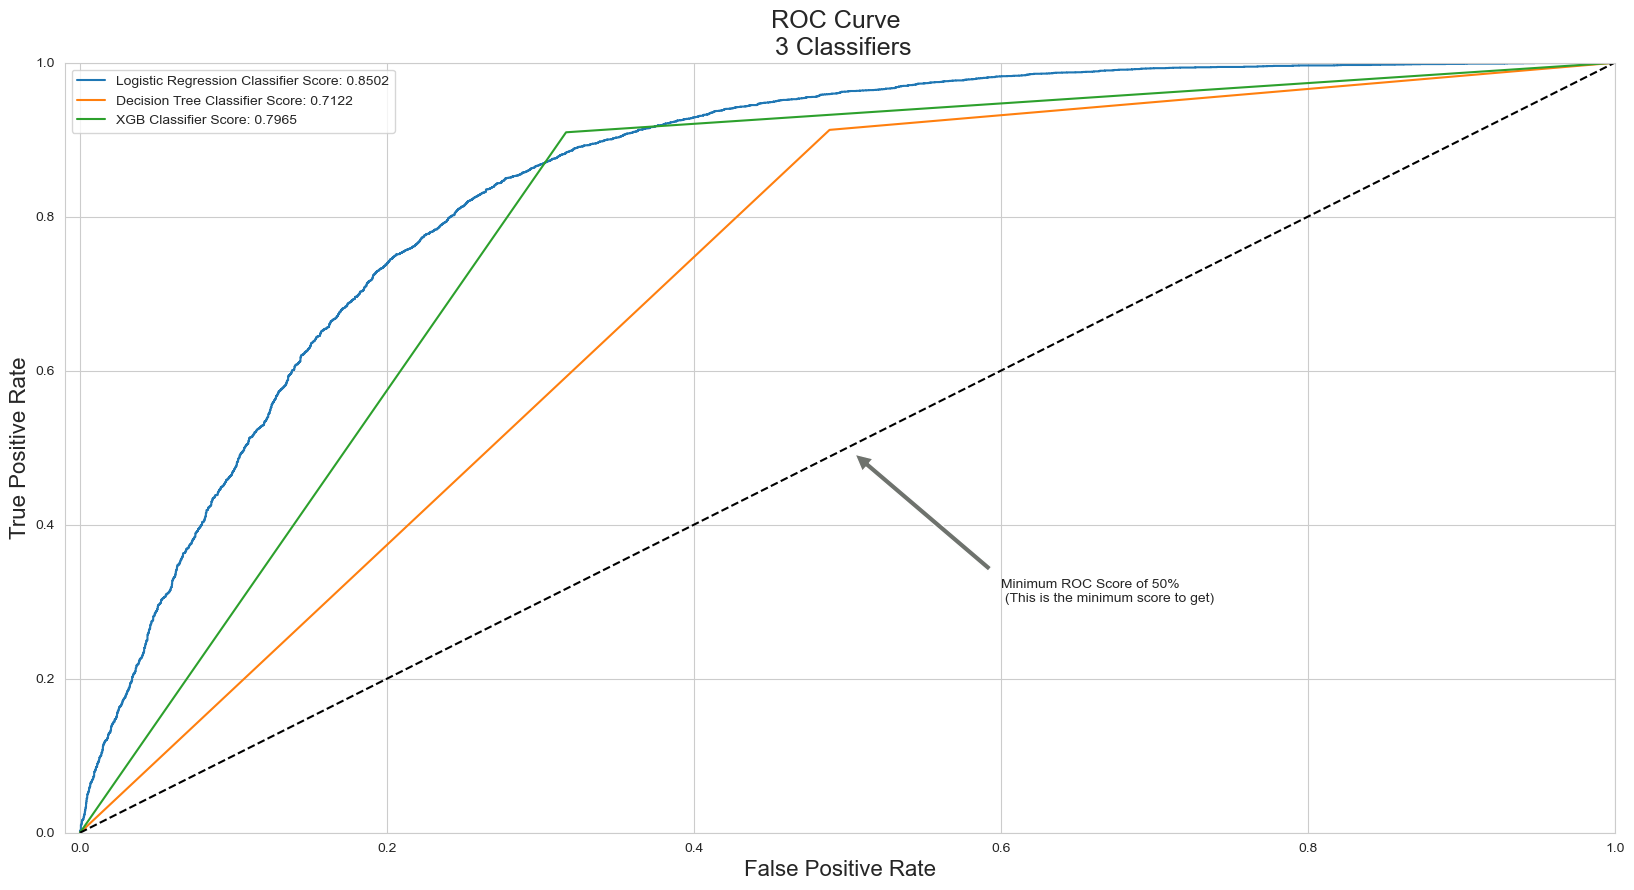

In [72]:
# ROC Curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). We tend to choose the model with the highest AUC.

log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_train, xgb_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, tree_fpr, tree_tpr, xgb_fpr, xgb_tpr):
    plt.figure(figsize=(20,10))
    plt.title('ROC Curve \n 3 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGB Classifier Score: {:.4f}'.format(roc_auc_score(y_train, xgb_pred)))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, tree_fpr, tree_tpr, xgb_fpr, xgb_tpr)
plt.show()

In [73]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 30)
print('Logistic Regression: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 30)

------------------------------------------------------------------------------------------
Logistic Regression: 

Recall Score: 0.84
Precision Score: 0.76
F1 Score: 0.80
Accuracy Score: 0.79
------------------------------------------------------------------------------------------


In [74]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train, tree_pred)

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = tree_clf.predict(X_train)

# Overfitting Case
print('---' * 30)
print('Decision Tree: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 30)

------------------------------------------------------------------------------------------
Decision Tree: 

Recall Score: 0.97
Precision Score: 0.65
F1 Score: 0.77
Accuracy Score: 0.72
------------------------------------------------------------------------------------------


In [75]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train, xgb_pred)

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = XGB_clf.predict(X_train)

# Overfitting Case
print('---' * 30)
print('XGboost: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 30)

------------------------------------------------------------------------------------------
XGboost: 

Recall Score: 0.93
Precision Score: 0.75
F1 Score: 0.83
Accuracy Score: 0.81
------------------------------------------------------------------------------------------


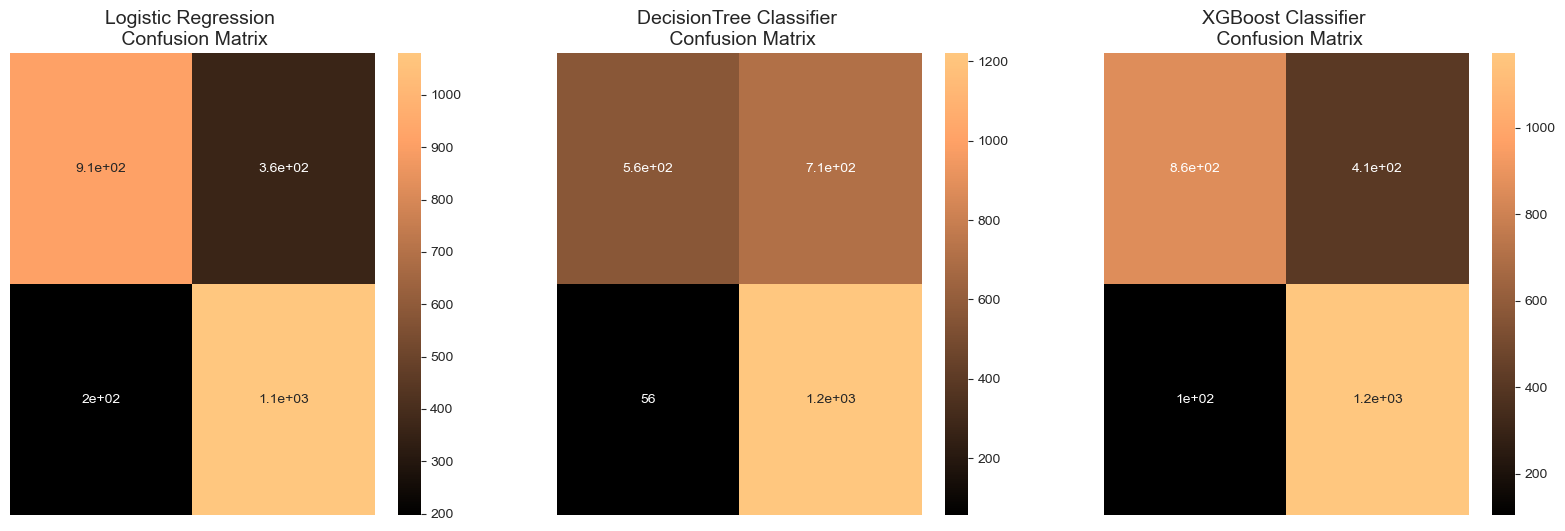

In [76]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred_log_reg = log_reg.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)
y_pred_xgb = XGB_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
tree_cf = confusion_matrix(y_test, y_pred_tree)
xgb_cf = confusion_matrix(y_test, y_pred_xgb)

f, (ax1, ax3, ax4) = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(log_reg_cf, ax=ax1, annot=True, cmap=plt.cm.copper)
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax1.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax1.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax3, annot=True, cmap=plt.cm.copper)
ax3.set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax3.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax3.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(xgb_cf, ax=ax4, annot=True, cmap=plt.cm.copper)
ax4.set_title("XGBoost Classifier \n Confusion Matrix", fontsize=14)
ax4.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax4.set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

Among all the classifier, XGBoost has a high recall score and the highest precision score, which means a good balance between minimizing violent crimes and saving resources to meet budget constrains. An ambitious major may want to use decision tree because it has the highest recall rate (97%), which promisingly predict most of the violent crimes in advance. On the other side, it requires a large amount of resources(police patrols and community watch leaders) due to its lowest precision rate. Logistic regression also performs well in the prediction task, which has the highest ROC AUC.

In [80]:
# show the result of test set
from sklearn.metrics import classification_report
print('Logistic Regression: \n', classification_report(y_test, y_pred_log_reg))
print('Decision Tree: \n', classification_report(y_test, y_pred_tree))
print('XGBoost: \n', classification_report(y_test, y_pred_xgb))


Logistic Regression: 
               precision    recall  f1-score   support

           0       0.82      0.72      0.77      1270
           1       0.75      0.85      0.79      1277

    accuracy                           0.78      2547
   macro avg       0.79      0.78      0.78      2547
weighted avg       0.79      0.78      0.78      2547

Decision Tree: 
               precision    recall  f1-score   support

           0       0.91      0.44      0.60      1270
           1       0.63      0.96      0.76      1277

    accuracy                           0.70      2547
   macro avg       0.77      0.70      0.68      2547
weighted avg       0.77      0.70      0.68      2547

XGBoost: 
               precision    recall  f1-score   support

           0       0.89      0.67      0.77      1270
           1       0.74      0.92      0.82      1277

    accuracy                           0.80      2547
   macro avg       0.82      0.80      0.79      2547
weighted avg       0.81

In [77]:
# Predict the likelihood of a violent crime happening per hour using XGB model
X_predict = pd_hour_combine[['datetime','temperature','rain_dummy'] + dummy_list].dropna().set_index(['datetime'])
X_array = X_predict.values
X_predict = X_predict.reset_index().join(pd.DataFrame(XGB_clf.predict_proba(X_array)))
X_predict = X_predict[['datetime','temperature','rain_dummy', 1]]
X_predict.columns = ['datetime', 'temperature','rain_dummy','XGB_likelihood']
# combine the true violent crimes and the predicted likelihood of violent crimes
X_predict['crime'] = pd_hour_combine['vcrime_count'].astype(bool).astype(int)
X_predict

,datetime,temperature,rain_dummy,XGB_likelihood,crime
0,2012-10-01 13:00:00,284.010000,0,1.0,1
1,2012-10-01 14:00:00,284.054691,0,1.0,1
2,2012-10-01 15:00:00,284.177412,0,1.0,1
3,2012-10-01 16:00:00,284.300133,0,1.0,1
4,2012-10-01 17:00:00,284.422855,0,1.0,1
...,...,...,...,...,...
45245,2017-11-29 20:00:00,281.340000,0,1.0,1
45246,2017-11-29 21:00:00,281.690000,0,1.0,1
45247,2017-11-29 22:00:00,281.070000,0,1.0,1
45248,2017-11-29 23:00:00,280.060000,0,1.0,1


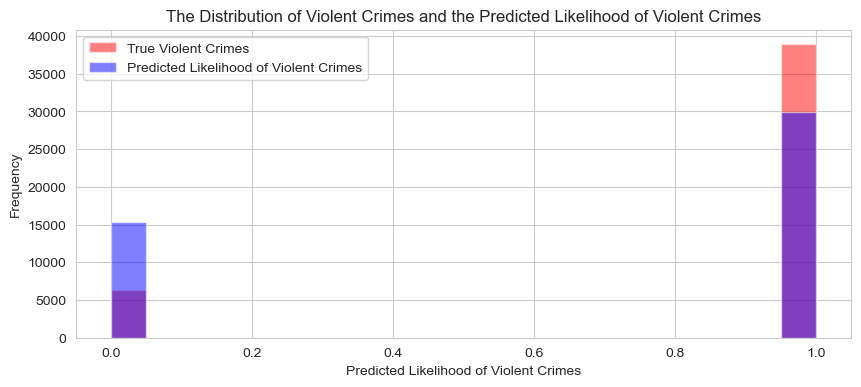

In [82]:
# compare the distribution of true violent crimes and the predicted likelihood of violent crimes
plt.figure(figsize=(10, 4))
plt.hist(X_predict['crime'], bins=20, alpha=0.5, color='r', label= 'True Violent Crimes')
plt.hist(X_predict['XGB_likelihood'], bins=20, alpha=0.5, color='b', label='Predicted Likelihood of Violent Crimes')
plt.title('The Distribution of Violent Crimes and the Predicted Likelihood of Violent Crimes')
plt.xlabel('Predicted Likelihood of Violent Crimes')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We can see in the picture, the true violent crimes and the predicted likelihood of violent crimes have a similar distribution. But there's a problem that the ture number of violent crimes is larger than the predicted likelihood of violent crimes. It may cause a problem that the police department may not have enough resources to prevent violent crimes. As a result, the police department may need to allocate more resources to prevent violent crimes.